# Allel`s ficsation in 9 sysytem: 0 or 10 "death" fixsation

In [1]:
#print("Allel`s ficsation in 0-10 sysytem: 0 or 10 \"death\" ficsation")
import numpy as np
from matplotlib import pylab as plt
from matplotlib import rcParams
%matplotlib inline

import random
import os
import pandas as pd

from scipy.stats import gamma
from scipy.stats import erlang

In [2]:
def catalogmaker(name='Graphics'):
    if not os.path.exists(name): 
        os.mkdir(name)# создание каталога 
        print('Каталог успешно создан', name)
    main_target=os.getcwd() + os.sep + name + os.sep
    return main_target

## 6.5 Ф-ции - визуализации рез-тов. 

In [3]:
def many_graph_from_tests(table,r_arr,name='expon'):
    rcParams['figure.dpi']=150
    fig, ax = plt.subplots(figsize=(6,3))#plt.figure(figsize=(6,3))
    
    main_target=catalogmaker(name='Graphics')
    
    x11=[i for i in range(11)]
    y11=[];y111=[]
    for i in range(11):
        y11.append(table['v_i'][i])
        y111.append(table['tau_i'][i])
    #print(y11,'\n',y111,'\n\n')
    
    plt.plot(x11, y11,label='v_i',color='b',marker="*")
    plt.plot(x11, y111,label='tau_i',color='g',marker="*")
    plt.plot(x11, r_arr,label='r',color='orange',marker="o")
    plt.xticks(np.arange(11))#pylab.ylim(0.0,1.0)
    plt.legend()
    plt.title('%s rate from startt i=%s'%(name,0))
    plt.xlabel('states')
    plt.ylabel('rate')
    plt.grid(True)#;plt.show()
    fig.savefig(main_target+name+'_test r_1')
    
    print()
    fig, ax = plt.subplots(figsize=(12,16))#plt.figure(figsize=(12,16))
    for i in range(1,11):
        plt.subplot(5,2,i)
        y11=[];y111=[]

        for j in range(11):
            y11.append(table['v_i'][(i)*11 + j ])
            y111.append(table['tau_i'][(i)*11 + j]) 
        #print(i,y11,'\n',y111,'\n\n')
        
        plt.plot(x11, y11,label='v_i',color='b',marker="*")
        plt.plot(x11, y111,label='tau_i',color='g',marker="*")
        plt.plot(x11, r_arr,label='r',color='orange',marker="o")
        plt.xticks(np.arange(11))#pylab.ylim(4.0,11.0)
        plt.legend()
        plt.title('%s rate from startt i=%s'%(name,i))
        plt.xlabel('states')
        plt.ylabel('rate')
        plt.grid(True)
    
    plt.tight_layout(h_pad = 1)
    fig.savefig(main_target+name+'_test r_2')
    #plt.show()
    #print('v_i:',y_answ1)
    #print('\ntau_i:',y_answ2) 

In [4]:
def take_pd(name='r_arr_',Mu_name=0.8,column='r_i',add_place=0):
    if add_place==0:
        folder='pd_tables'
    else:
        folder=add_place + os.sep + 'pd_tables'
    targ=os.getcwd() + os.sep + folder + os.sep
    if name =='expon' or name =='gamma_2k' or name =='gamma_3k':
        y_answ0=[]
        y_answ1=[]
        y_answ2=[]
        _name=name
        y=pd.read_csv(targ+'y_answ_'+_name+'_'+str(Mu_name),sep=',',index_col=0)
        #print(y)
        for i in range(NNN*2+1):
            y_answ0.append(y['y_answ0'][i])
            y_answ1.append(y['y_answ1'][i])
            y_answ2.append(y['y_answ2'][i])
        return [y_answ0,y_answ1,y_answ2]
    
    else: # if name =='r_arr_'
        r=pd.read_csv(targ+name+str(Mu_name),sep=',',index_col=0)
        r_arr=[]
        for i in range(NNN*2+1):
                r_arr.append(round(r[column][i],8))
        return r_arr    
#y_answ0

In [5]:
NNN=5
#Mu_name=0.8#Mu[3]

folder='pd_tables'
folder=os.getcwd() + os.sep + folder + os.sep
Mu=0.8

[0.05072954, 0.0469718, 0.0142593, 0.00814817, 0.00679014, 0.00760496, 0.0112346, 0.02246919, 0.06654338, 0.38024791, 0.38500101]



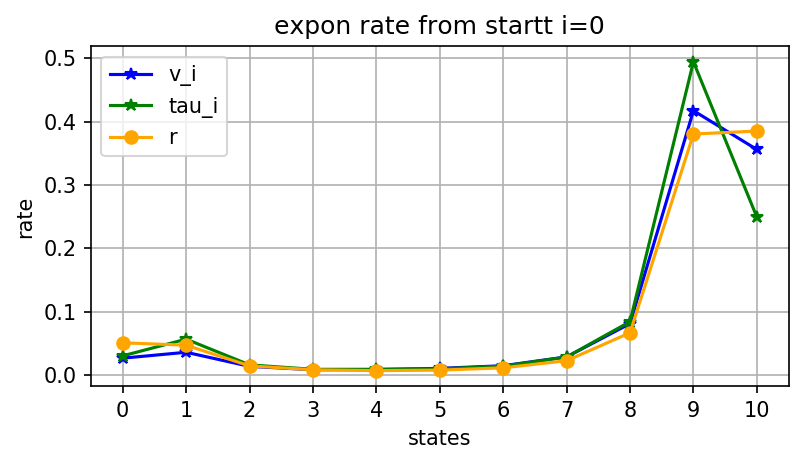

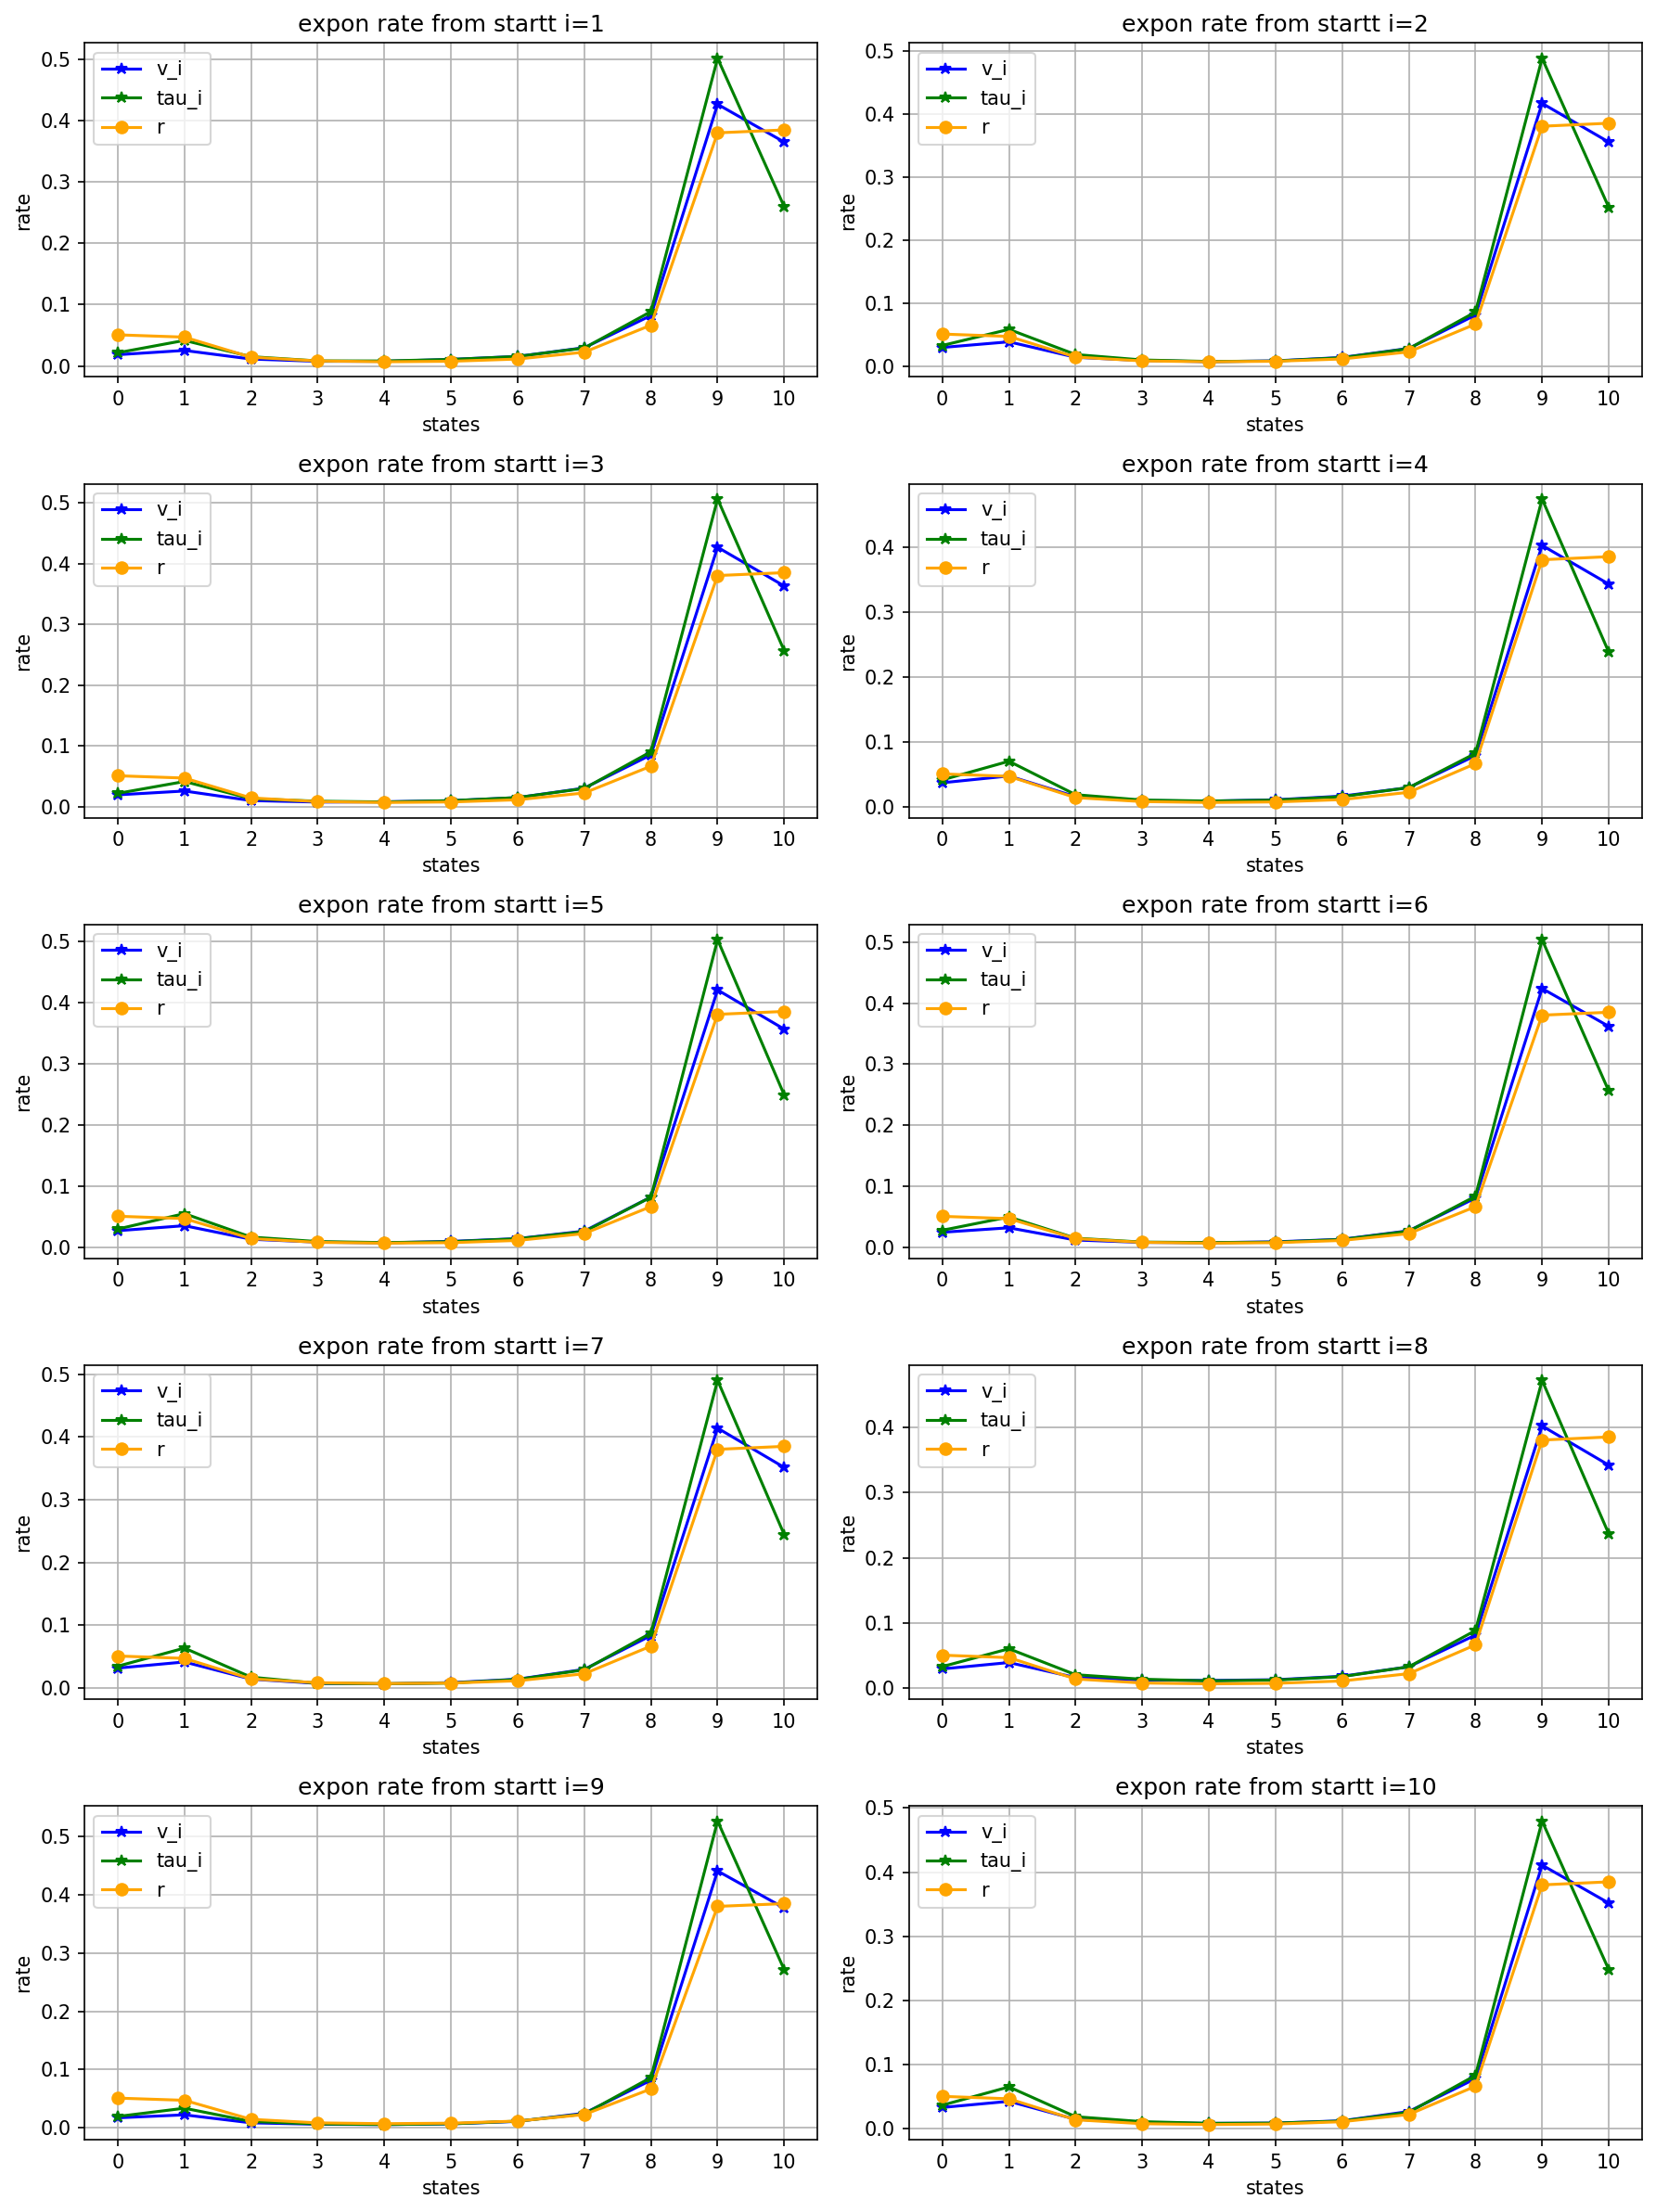

In [6]:
_name='expon'

r_arr=take_pd(name='r_arr_',Mu_name=Mu,column='r_i')
print(r_arr)
my_ser=pd.read_csv(folder+'Freac_test_table_'+_name+'_'+str(Mu),sep=',',index_col=0)
many_graph_from_tests(my_ser,r_arr,name=_name)
##my_ser

In [7]:
'''
_name='gamma_2k'
my_ser=pd.read_csv(folder+'Freac_test_table_'+_name+'_'+str(Mu),sep=',',index_col=0)
many_graph_from_tests(my_ser,r_arr,name=_name)
##my_ser
'''

"\n_name='gamma_2k'\nmy_ser=pd.read_csv(folder+'Freac_test_table_'+_name+'_'+str(Mu),sep=',',index_col=0)\nmany_graph_from_tests(my_ser,r_arr,name=_name)\n##my_ser\n"

In [8]:
'''
_name='gamma_3k'
my_ser=pd.read_csv(folder+'Freac_test_table_'+_name+'_'+str(Mu),sep=',',index_col=0)
many_graph_from_tests(my_ser,r_arr,name=_name)
##my_ser
'''

"\n_name='gamma_3k'\nmy_ser=pd.read_csv(folder+'Freac_test_table_'+_name+'_'+str(Mu),sep=',',index_col=0)\nmany_graph_from_tests(my_ser,r_arr,name=_name)\n##my_ser\n"

In [9]:
#import pylab
#asssa=round(gamma.rvs(2,scale=1/5,size=1),5)
#print(asssa,type(asssa))

def avarage_graph(y_answ0,y_answ1,y_answ2,name='expon'):
    rcParams['figure.dpi']=150
    fig, ax = plt.subplots(figsize=(8,4))#fig = plt.figure(figsize=(8,4))
    x11=[0,1,2,3,4,5,6,7,8,9,10]
    
    main_target=catalogmaker(name='Graphics')
    
    plt.plot(x11, y_answ0,label='r')
    plt.plot(x11, y_answ1,label='v_i')
    plt.plot(x11, y_answ2,label='tau_i')
    plt.ylim(4.0,11.0)
    plt.xticks(np.arange(11))
    plt.legend()
    plt.title('Avarge number of individs from diff start states by %s'%(name))
    plt.xlabel('start states')
    plt.ylabel('amount of individs')
    plt.grid(True)
    fig.savefig(main_target+name+'_individs_test_number')#plt.show()
    print('v_i:',np.round(y_answ1,5))
    print('\ntau_i:',np.round(y_answ2,5))
    
#посчитаем отклонения от теоретичесого количества особей
def delta_counter(y_answ0,y_answ1,y_answ2,name='expon'): 
    print(name)
    detlta_v=np.array(y_answ0)-np.array(y_answ1)
    detlta_tau=np.array(y_answ0)-np.array(y_answ2)
    
    for i in range(len(detlta_v)):
        detlta_v[i]=np.round(detlta_v[i]**2,8)
        detlta_tau[i]=np.round(detlta_tau[i]**2,8)
    
    print('detlta_v:', detlta_v, '\n', 'detlta_tau:', detlta_tau,'\n')
    print('max(quad_v)=',max(np.round(detlta_v,5)),'\t','quad_sum_v=',np.round(sum(detlta_v),5))
    print('max(quad_tau)=',max(np.round(detlta_tau,5)),'\t','quad_sum_tau=',np.round(sum(detlta_tau),5)) 

v_i: [8.42151 8.6053  8.38669 8.60154 8.18477 8.43286 8.50385 8.35109 8.25298
 8.74236 8.29362]

tau_i: [8.09553 8.30225 8.05843 8.31482 7.83241 8.11618 8.20401 8.01655 7.90866
 8.50161 7.93898]
expon
detlta_v: [5.1578950e-02 1.6883881e-01 3.6975440e-02 1.6576298e-01 9.2740000e-05
 5.6863170e-02 9.5759300e-02 2.4551760e-02 3.4316200e-03 3.0026016e-01
 9.8446100e-03] 
 detlta_tau: [9.7752800e-03 1.1631620e-02 1.8487840e-02 1.4500980e-02 1.3103676e-01
 6.1183700e-03 9.2350000e-05 3.1630620e-02 8.1647350e-02 9.4377980e-02
 6.5239380e-02] 

max(quad_v)= 0.30026 	 quad_sum_v= 0.91396
max(quad_tau)= 0.13104 	 quad_sum_tau= 0.46454


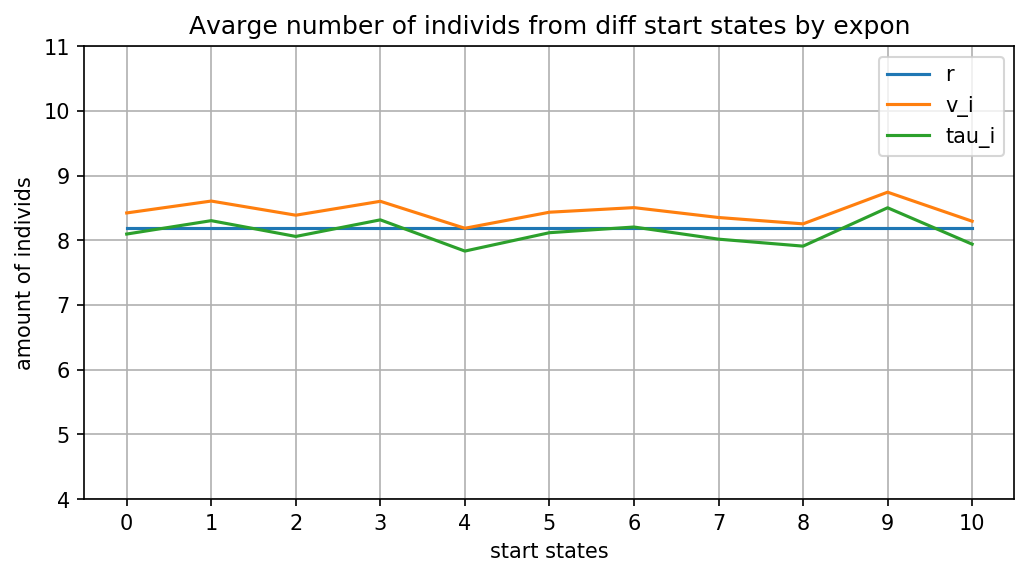

In [10]:
name='expon'
y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8)[0],take_pd(name,Mu_name=0.8)[1],take_pd(name,Mu_name=0.8)[2]
avarage_graph(y_answ0,y_answ1,y_answ2,name='expon')

#y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8)[0],take_pd(name,Mu_name=0.8)[1],take_pd(name,Mu_name=0.8)[2]
delta_counter(y_answ0,y_answ1,y_answ2,name='expon')

In [11]:
'''
name='gamma_2k'
y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8,add_place='08')[0],take_pd(name,Mu_name=0.8,add_place='08')[1],take_pd(name,Mu_name=0.8,add_place='08')[2]

#Форс мажор: спецаильно для Эрланга y_answ0-нужно пересчитать
y_answ0=take_pd(name='tau_i_aver_gamma_2k_',Mu_name=0.8,column='tau_i_aver',add_place='08')
print(y_answ0)
x_i=[x for x in range(0,11)]
box=0
for i in range(len(y_answ0)):
    box+=x_i[i]*y_answ0[i]
for i in range(len(y_answ0)): y_answ0[i]=box
print(y_answ0)

avarage_graph(y_answ0,y_answ1,y_answ2,name='gamma_2k')
#y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8)[0],take_pd(name,Mu_name=0.8)[1],take_pd(name,Mu_name=0.8)[2]
delta_counter(y_answ0,y_answ1,y_answ2,name='gamma_2k')
'''

"\nname='gamma_2k'\ny_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8,add_place='08')[0],take_pd(name,Mu_name=0.8,add_place='08')[1],take_pd(name,Mu_name=0.8,add_place='08')[2]\n\n#Форс мажор: спецаильно для Эрланга y_answ0-нужно пересчитать\ny_answ0=take_pd(name='tau_i_aver_gamma_2k_',Mu_name=0.8,column='tau_i_aver',add_place='08')\nprint(y_answ0)\nx_i=[x for x in range(0,11)]\nbox=0\nfor i in range(len(y_answ0)):\n    box+=x_i[i]*y_answ0[i]\nfor i in range(len(y_answ0)): y_answ0[i]=box\nprint(y_answ0)\n\navarage_graph(y_answ0,y_answ1,y_answ2,name='gamma_2k')\n#y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8)[0],take_pd(name,Mu_name=0.8)[1],take_pd(name,Mu_name=0.8)[2]\ndelta_counter(y_answ0,y_answ1,y_answ2,name='gamma_2k')\n"

In [12]:
'''
name='gamma_3k'
y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8,add_place='08')[0],take_pd(name,Mu_name=0.8,add_place='08')[1],take_pd(name,Mu_name=0.8,add_place='08')[2]

#Форс мажор: спецаильно для Эрланга y_answ0-нужно пересчитать
y_answ0=take_pd(name='tau_i_aver_gamma_3k_',Mu_name=0.8,column='tau_i_aver',add_place='08')
x_i=[x for x in range(0,11)]
box=0
for i in range(len(y_answ0)):
    box+=x_i[i]*y_answ0[i]
for i in range(len(y_answ0)): y_answ0[i]=box
print(y_answ0)

avarage_graph(y_answ0,y_answ1,y_answ2,name='gamma_3k')
#y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8)[0],take_pd(name,Mu_name=0.8)[1],take_pd(name,Mu_name=0.8)[2]
delta_counter(y_answ0,y_answ1,y_answ2,name='gamma_3k')
'''

"\nname='gamma_3k'\ny_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8,add_place='08')[0],take_pd(name,Mu_name=0.8,add_place='08')[1],take_pd(name,Mu_name=0.8,add_place='08')[2]\n\n#Форс мажор: спецаильно для Эрланга y_answ0-нужно пересчитать\ny_answ0=take_pd(name='tau_i_aver_gamma_3k_',Mu_name=0.8,column='tau_i_aver',add_place='08')\nx_i=[x for x in range(0,11)]\nbox=0\nfor i in range(len(y_answ0)):\n    box+=x_i[i]*y_answ0[i]\nfor i in range(len(y_answ0)): y_answ0[i]=box\nprint(y_answ0)\n\navarage_graph(y_answ0,y_answ1,y_answ2,name='gamma_3k')\n#y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8)[0],take_pd(name,Mu_name=0.8)[1],take_pd(name,Mu_name=0.8)[2]\ndelta_counter(y_answ0,y_answ1,y_answ2,name='gamma_3k')\n"

In [13]:
#old version differ with expon
name='gamma_2k'
#y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8)[0],take_pd(name,Mu_name=0.8)[1],take_pd(name,Mu_name=0.8)[2]
#delta_counter(y_answ0,y_answ1,y_answ2,name='gamma_2k')
print('\n\n')
name='gamma_3k'
#y_answ0,y_answ1,y_answ2=take_pd(name,Mu_name=0.8)[0],take_pd(name,Mu_name=0.8)[1],take_pd(name,Mu_name=0.8)[2]
#delta_counter(y_answ0,y_answ1,y_answ2,name='gamma_3k')

# График bar() для tau & v 

In [20]:
pre_name1='R_i_aver_';pre_name2='T_i_aver_'
pre_name3='toFIX_N_';pre_name4='toFIX_T_'
pre_name5='v_i_aver_';pre_name6='tau_i_aver_'

_name1='expon_';_name2='gamma_2k_';_name3='gamma_3k_'


R_1=take_pd(name=pre_name1+_name1,Mu_name=0.8,column='R_i_avar')#общее среднее от усредненных кол-во вхождений в каждое сост
T_i_1=take_pd(name=pre_name2+_name1,Mu_name=0.8,column='T_i_avar')#общее среднее от усредненных время пребывания в каждом 

N_1=take_pd(name=pre_name3+_name1,Mu_name=0.8,column='N_toFIX')#среднее кол-во поколений до фиксации из каждого 
T_1=take_pd(name=pre_name4+_name1,Mu_name=0.8,column='T_toFIX')#среднее время до фиксации из каждого 

v_i_1=take_pd(name=pre_name5+_name1,Mu_name=0.8,column='v_i_aver')#общее среднее от усредненных частота по попаданиям
tau_i_1=take_pd(name=pre_name6+_name1,Mu_name=0.8,column='tau_i_aver')#общее среднее от усредненных частота по времени

#'''
R_2=take_pd(name=pre_name1+_name2,Mu_name=0.8,column='R_i_avar',add_place='08')#общее среднее от усредненных   
R_3=take_pd(name=pre_name1+_name3,Mu_name=0.8,column='R_i_avar',add_place='08')#кол-во вхождений в каждое сост

T_i_2=take_pd(name=pre_name2+_name2,Mu_name=0.8,column='T_i_avar',add_place='08')#общее среднее от усредненных
T_i_3=take_pd(name=pre_name2+_name3,Mu_name=0.8,column='T_i_avar',add_place='08')#время пребывания в каждом 

N_2=take_pd(name=pre_name3+_name2,Mu_name=0.8,column='N_toFIX',add_place='08')#среднее  
N_3=take_pd(name=pre_name3+_name3,Mu_name=0.8,column='N_toFIX',add_place='08')#кол-во поколений до фиксации из каждого 

T_2=take_pd(name=pre_name4+_name2,Mu_name=0.8,column='T_toFIX',add_place='08')#среднее  
T_3=take_pd(name=pre_name4+_name3,Mu_name=0.8,column='T_toFIX',add_place='08')#время до фиксации из каждого 

v_i_2=take_pd(name=pre_name5+_name2,Mu_name=0.8,column='v_i_aver',add_place='08')#общее среднее от усредненных
v_i_3=take_pd(name=pre_name5+_name3,Mu_name=0.8,column='v_i_aver',add_place='08')#частота по попаданиям

tau_i_2=take_pd(name=pre_name6+_name2,Mu_name=0.8,column='tau_i_aver',add_place='08')#общее среднее от усредненных
tau_i_3=take_pd(name=pre_name6+_name3,Mu_name=0.8,column='tau_i_aver',add_place='08')#частота по времени
#'''

# Bar () version with neighbor -2 layer

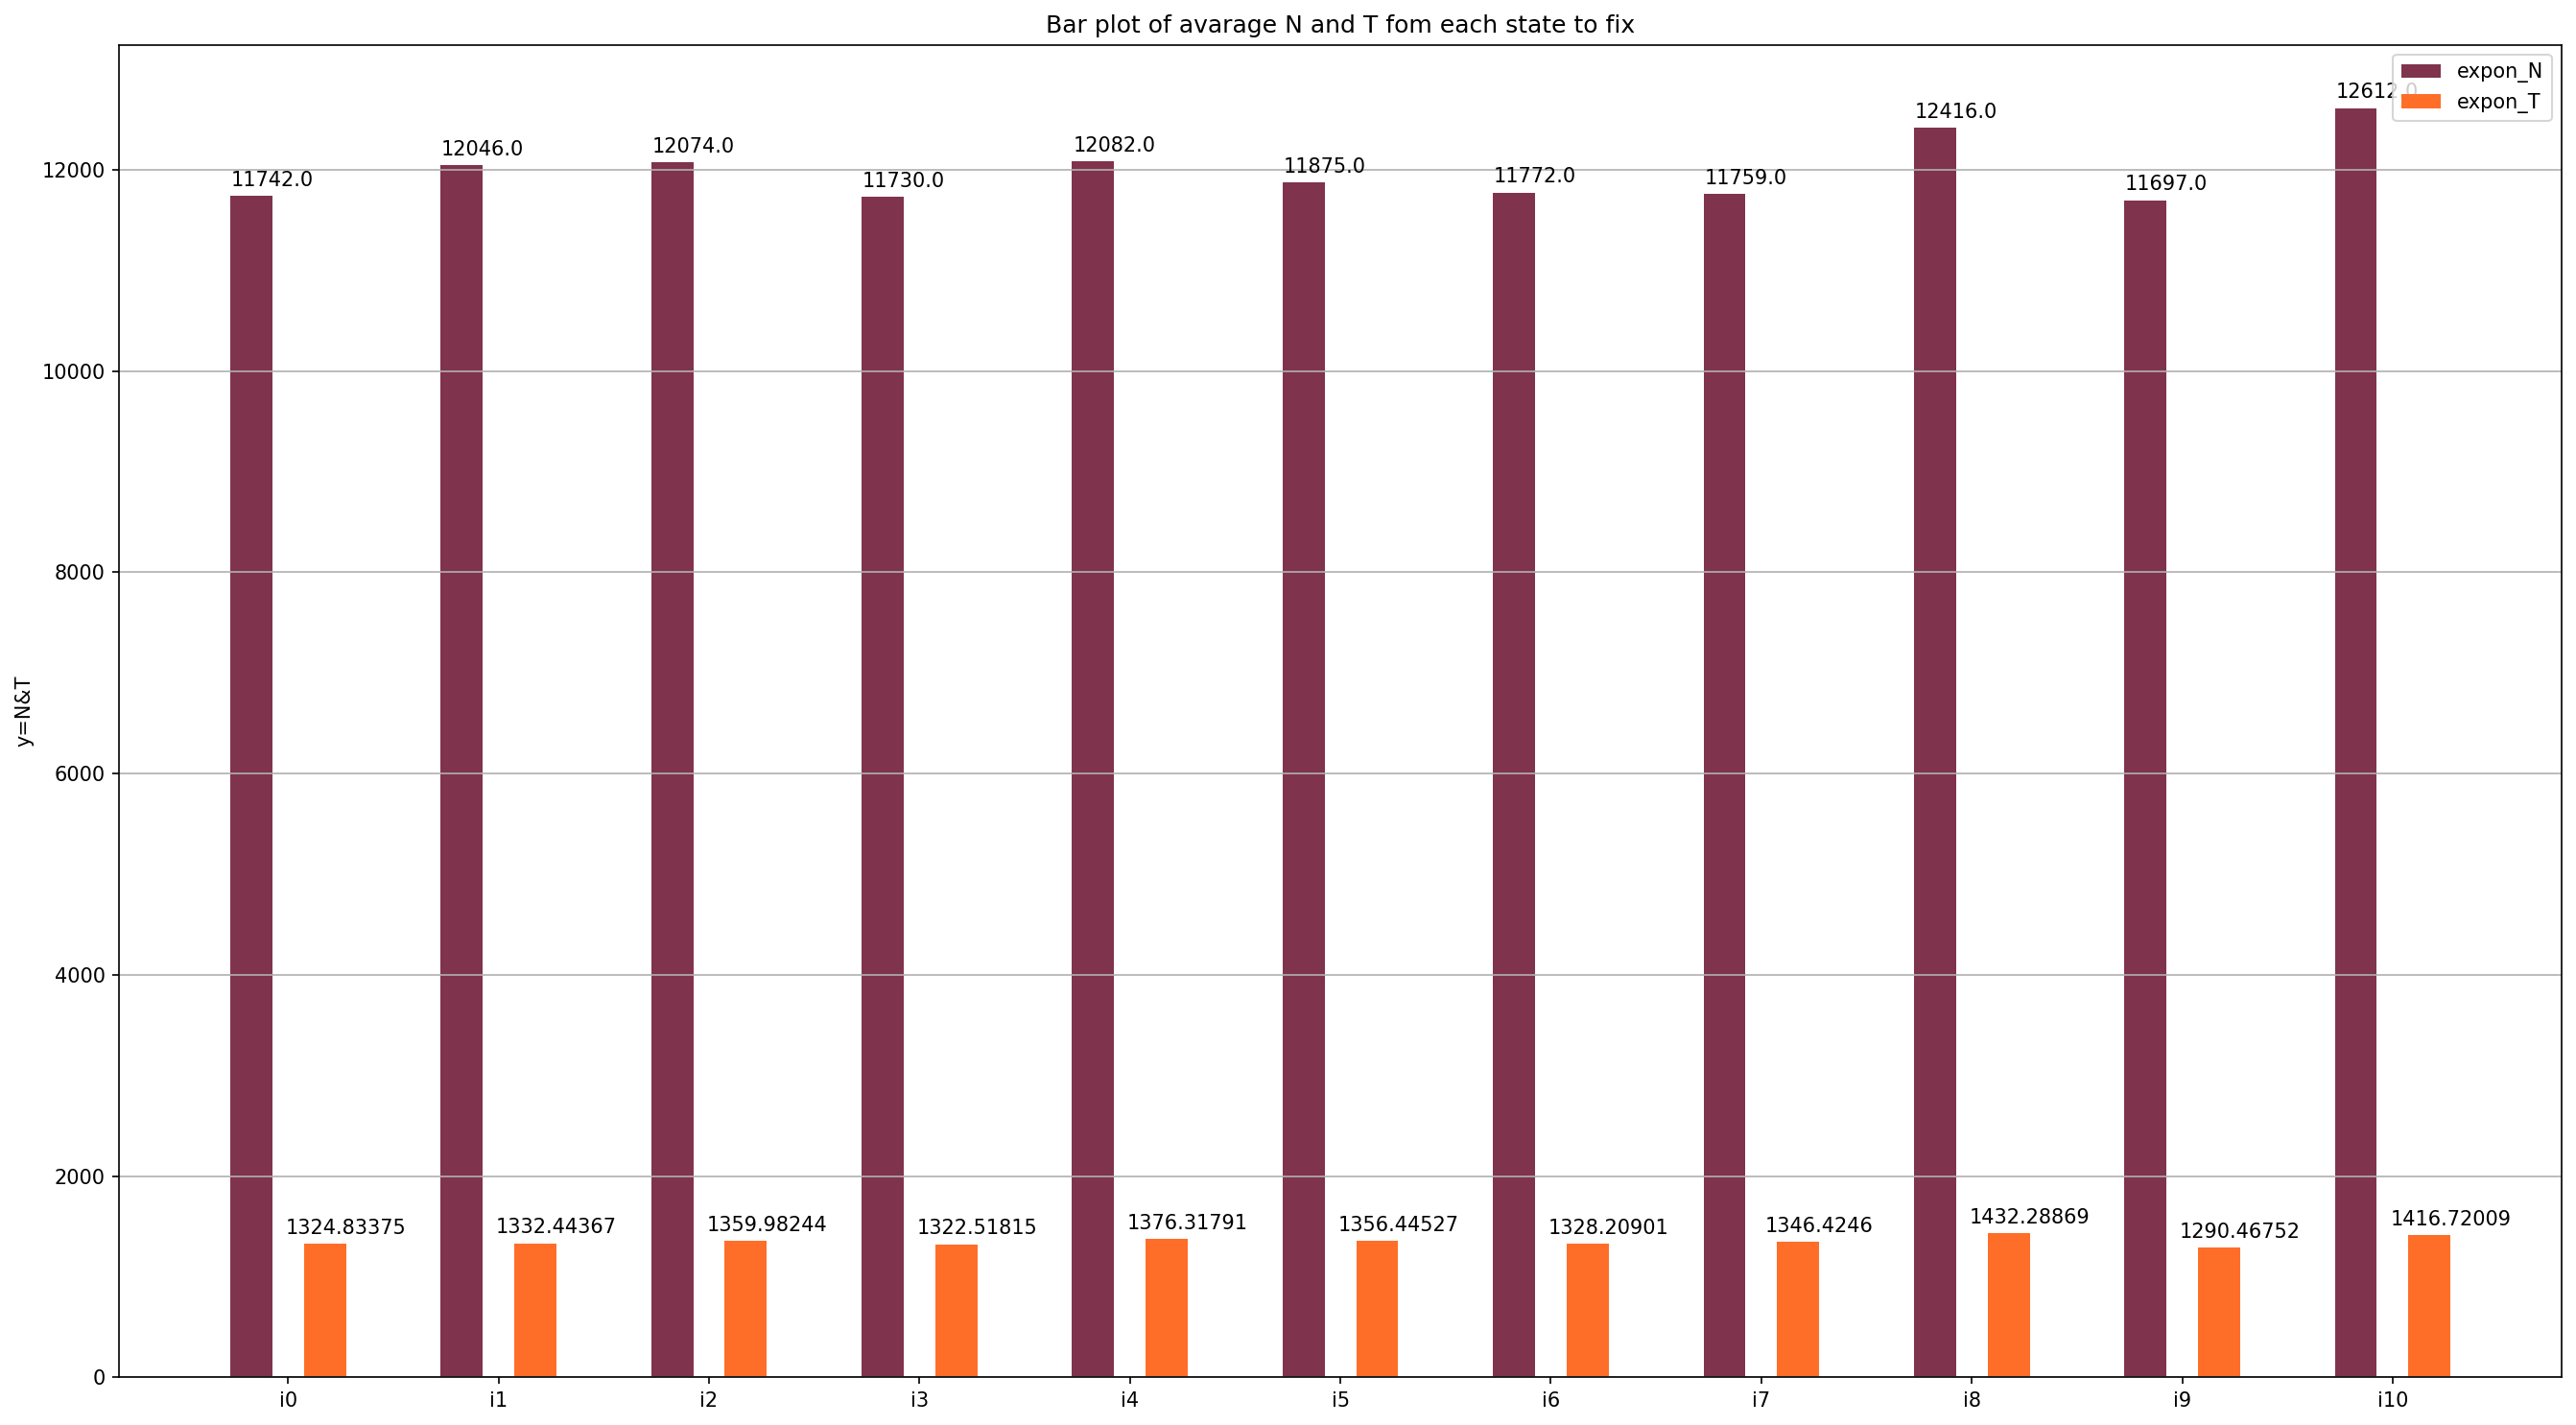

In [21]:
def expon_bar_next_builder(col11,col21,name1='expon_',Mu_name=0.8):
    labels = ['i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10']
    x = np.arange(len(labels))  # the label locations
    width1 = 0.35  # the width of the bars
    width2 = 0.2
    fig, ax = plt.subplots(figsize=(18,10))
    main_target=catalogmaker(name='Graphics')

    rects11 = ax.bar(x - width1/2, col11, color = (0.5, 0.2, 0.3), width = width2, label=name1+'N')
    rects21 = ax.bar(x + width1/2, col21, color = (1, 0.43, 0.16), width = width2, label=name1+'T')
    
    #(0.86,0.0,0.58,0.5) Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('y=N&T')
    ax.set_title('Bar plot of avarage N and T fom each state to fix')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() +0.1+ rect.get_width() / 2, height),xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects11)
    autolabel(rects21)
    fig.tight_layout()
    plt.grid(axis = 'y')
    fig.savefig(main_target+'avarage N and T_')
    plt.show()


def bar_next_builder(col11,col12,col21,col22,name1='gamma_2k_',name2='gamma_3k_',Mu_name=0.8):
    labels = ['i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10']
    x = np.arange(len(labels))  # the label locations
    width1 = 0.35  # the width of the bars
    width2 = 0.2
    fig, ax = plt.subplots(figsize=(18,10))
    main_target=catalogmaker(name='Graphics')

    rects11 = ax.bar(x - width1/2, col11, color = (0.5, 0.2, 0.3), width = width2, label=name1+'N')
    rects12 = ax.bar(x - width1/2, col12, color = (0.81,0.62,0.20,0.5),edgecolor = 'black', width = width1,label=name2+'N')#color=color1
    rects21 = ax.bar(x + width1/2, col21, color = (1, 0.43, 0.16), width = width2, label=name1+'T')
    rects22 = ax.bar(x + width1/2, col22, color = (1.0,0.36,0.79,0.5),edgecolor = 'black', width = width1,label=name2+'T')#color=color2
    #(0.86,0.0,0.58,0.5) Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('y=N&T')
    ax.set_title('Bar plot of avarage N and T fom each state to fix')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects11)
    autolabel(rects12)
    autolabel(rects21)
    autolabel(rects22)
    fig.tight_layout()
    plt.grid(axis = 'y')
    fig.savefig(main_target+'avarage N and T_')
    plt.show()
    
expon_bar_next_builder(N_1,T_1)
#bar_next_builder(N_2,N_3,T_2,T_3)

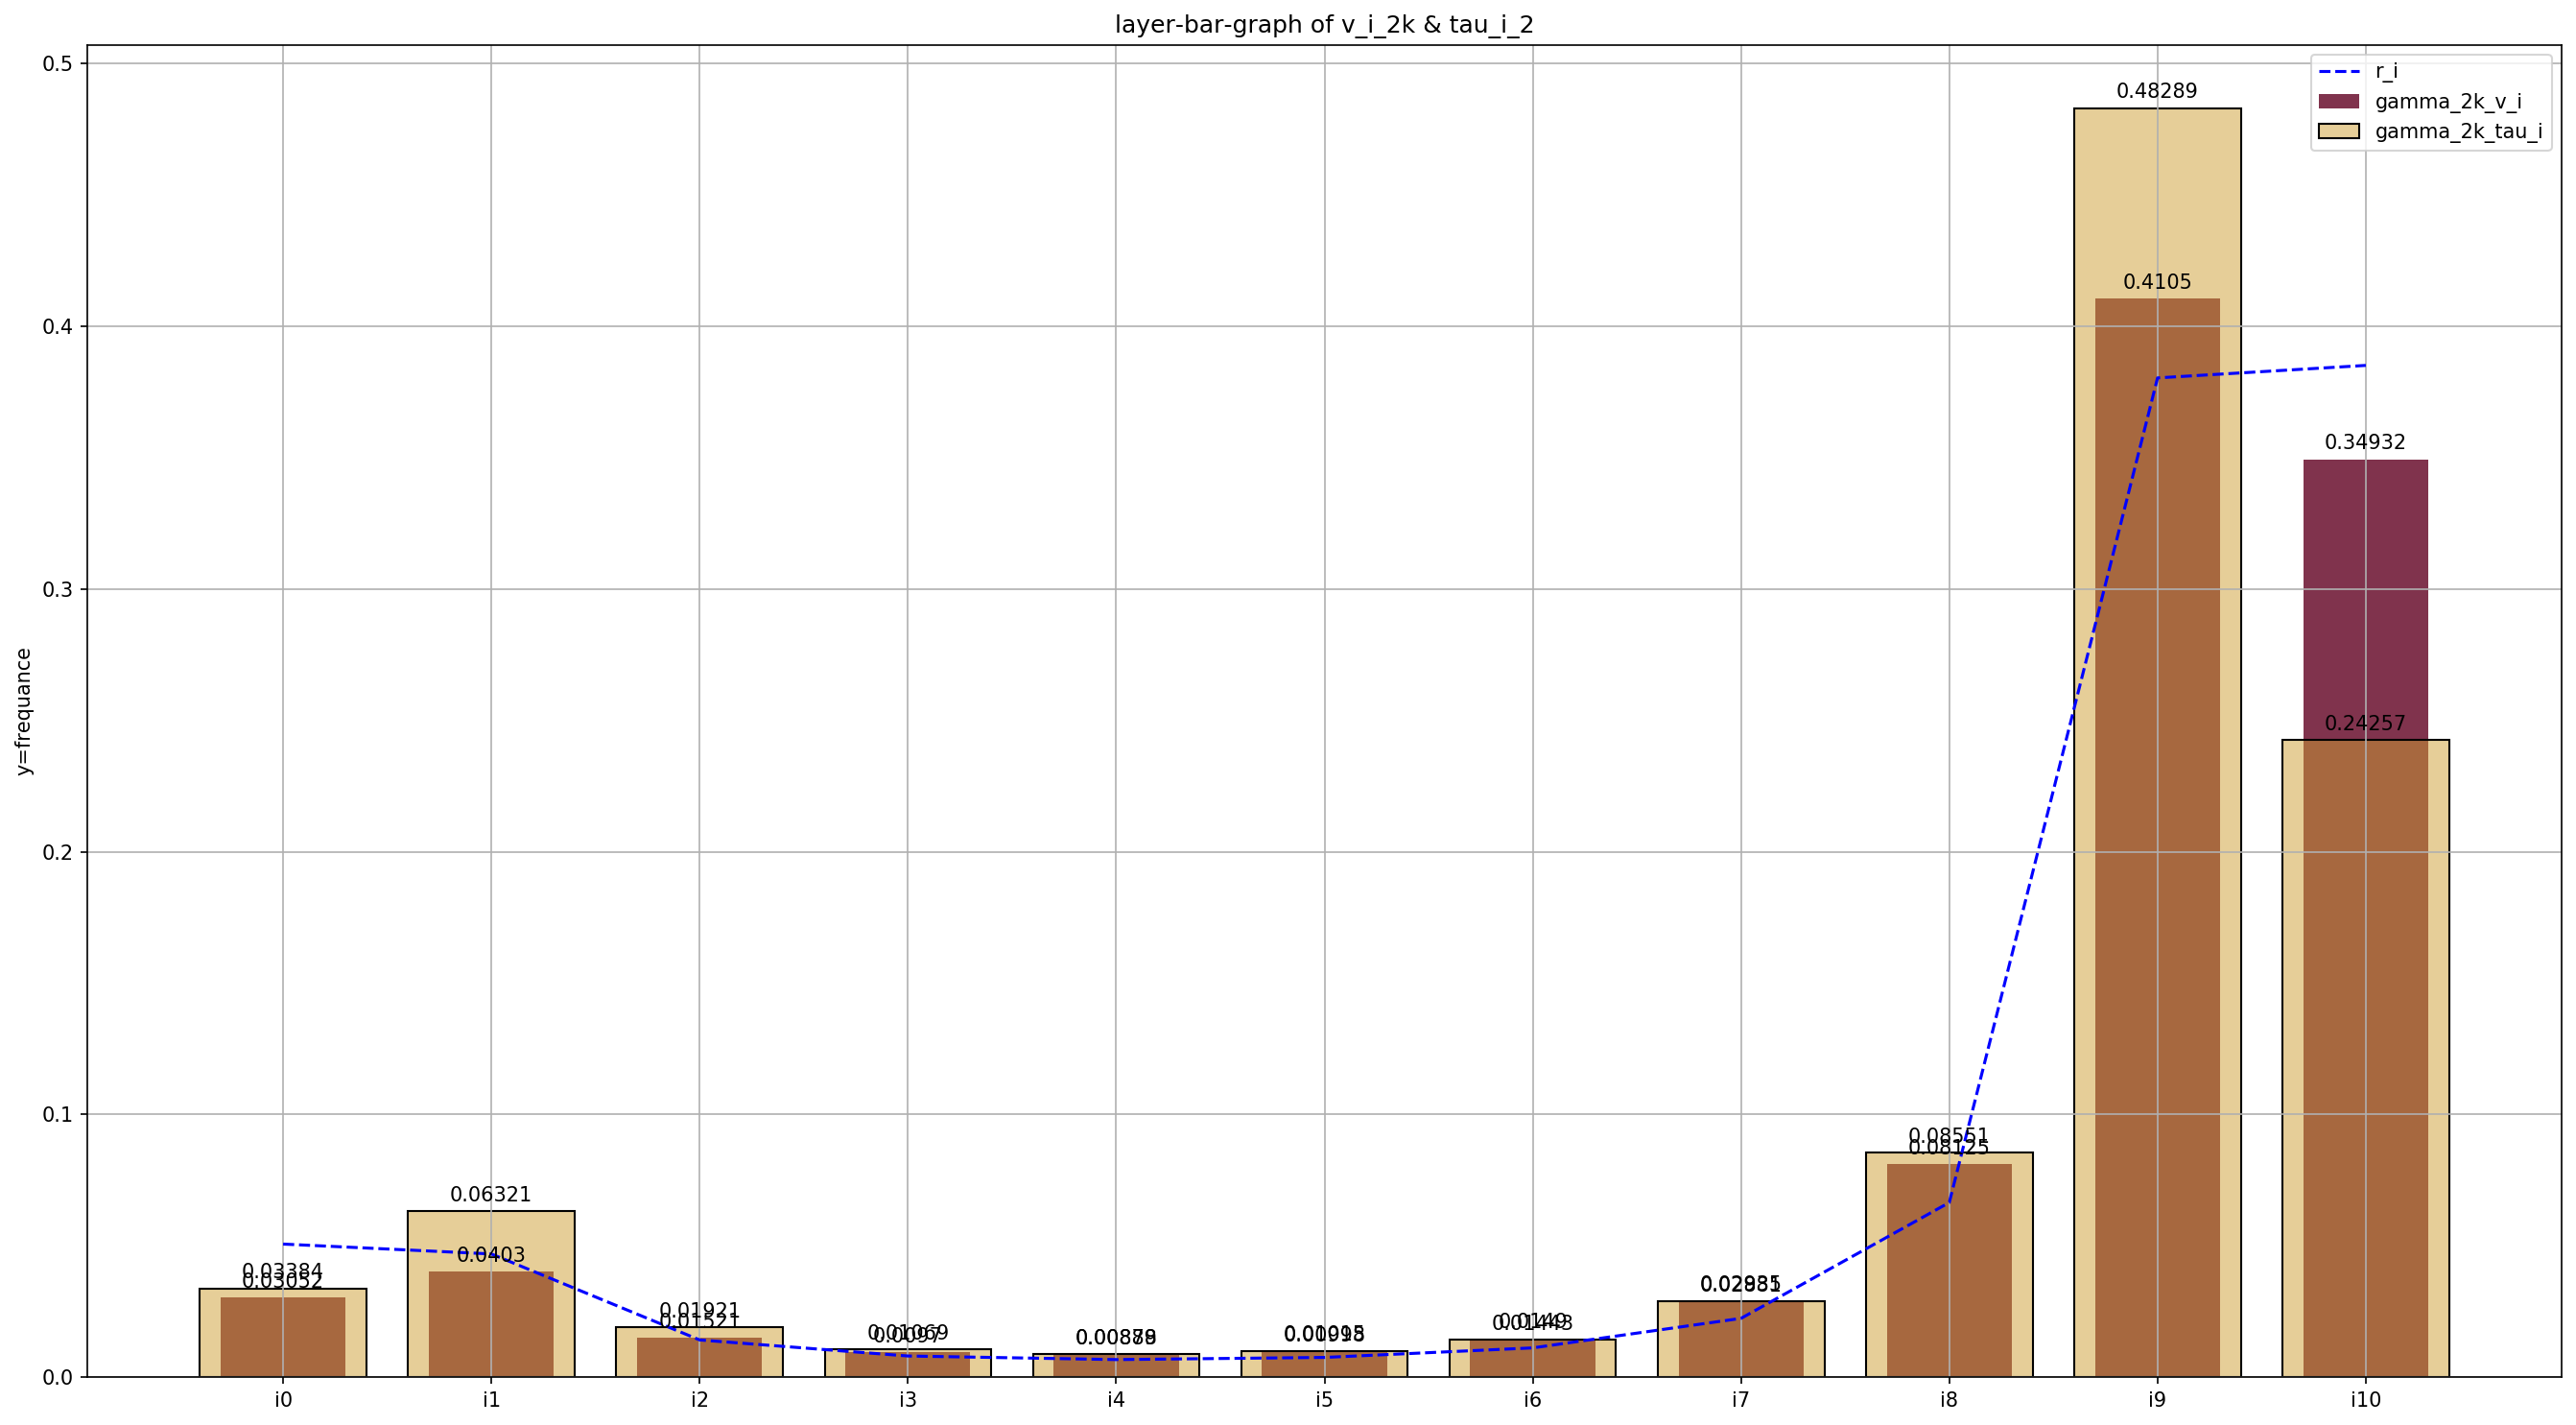

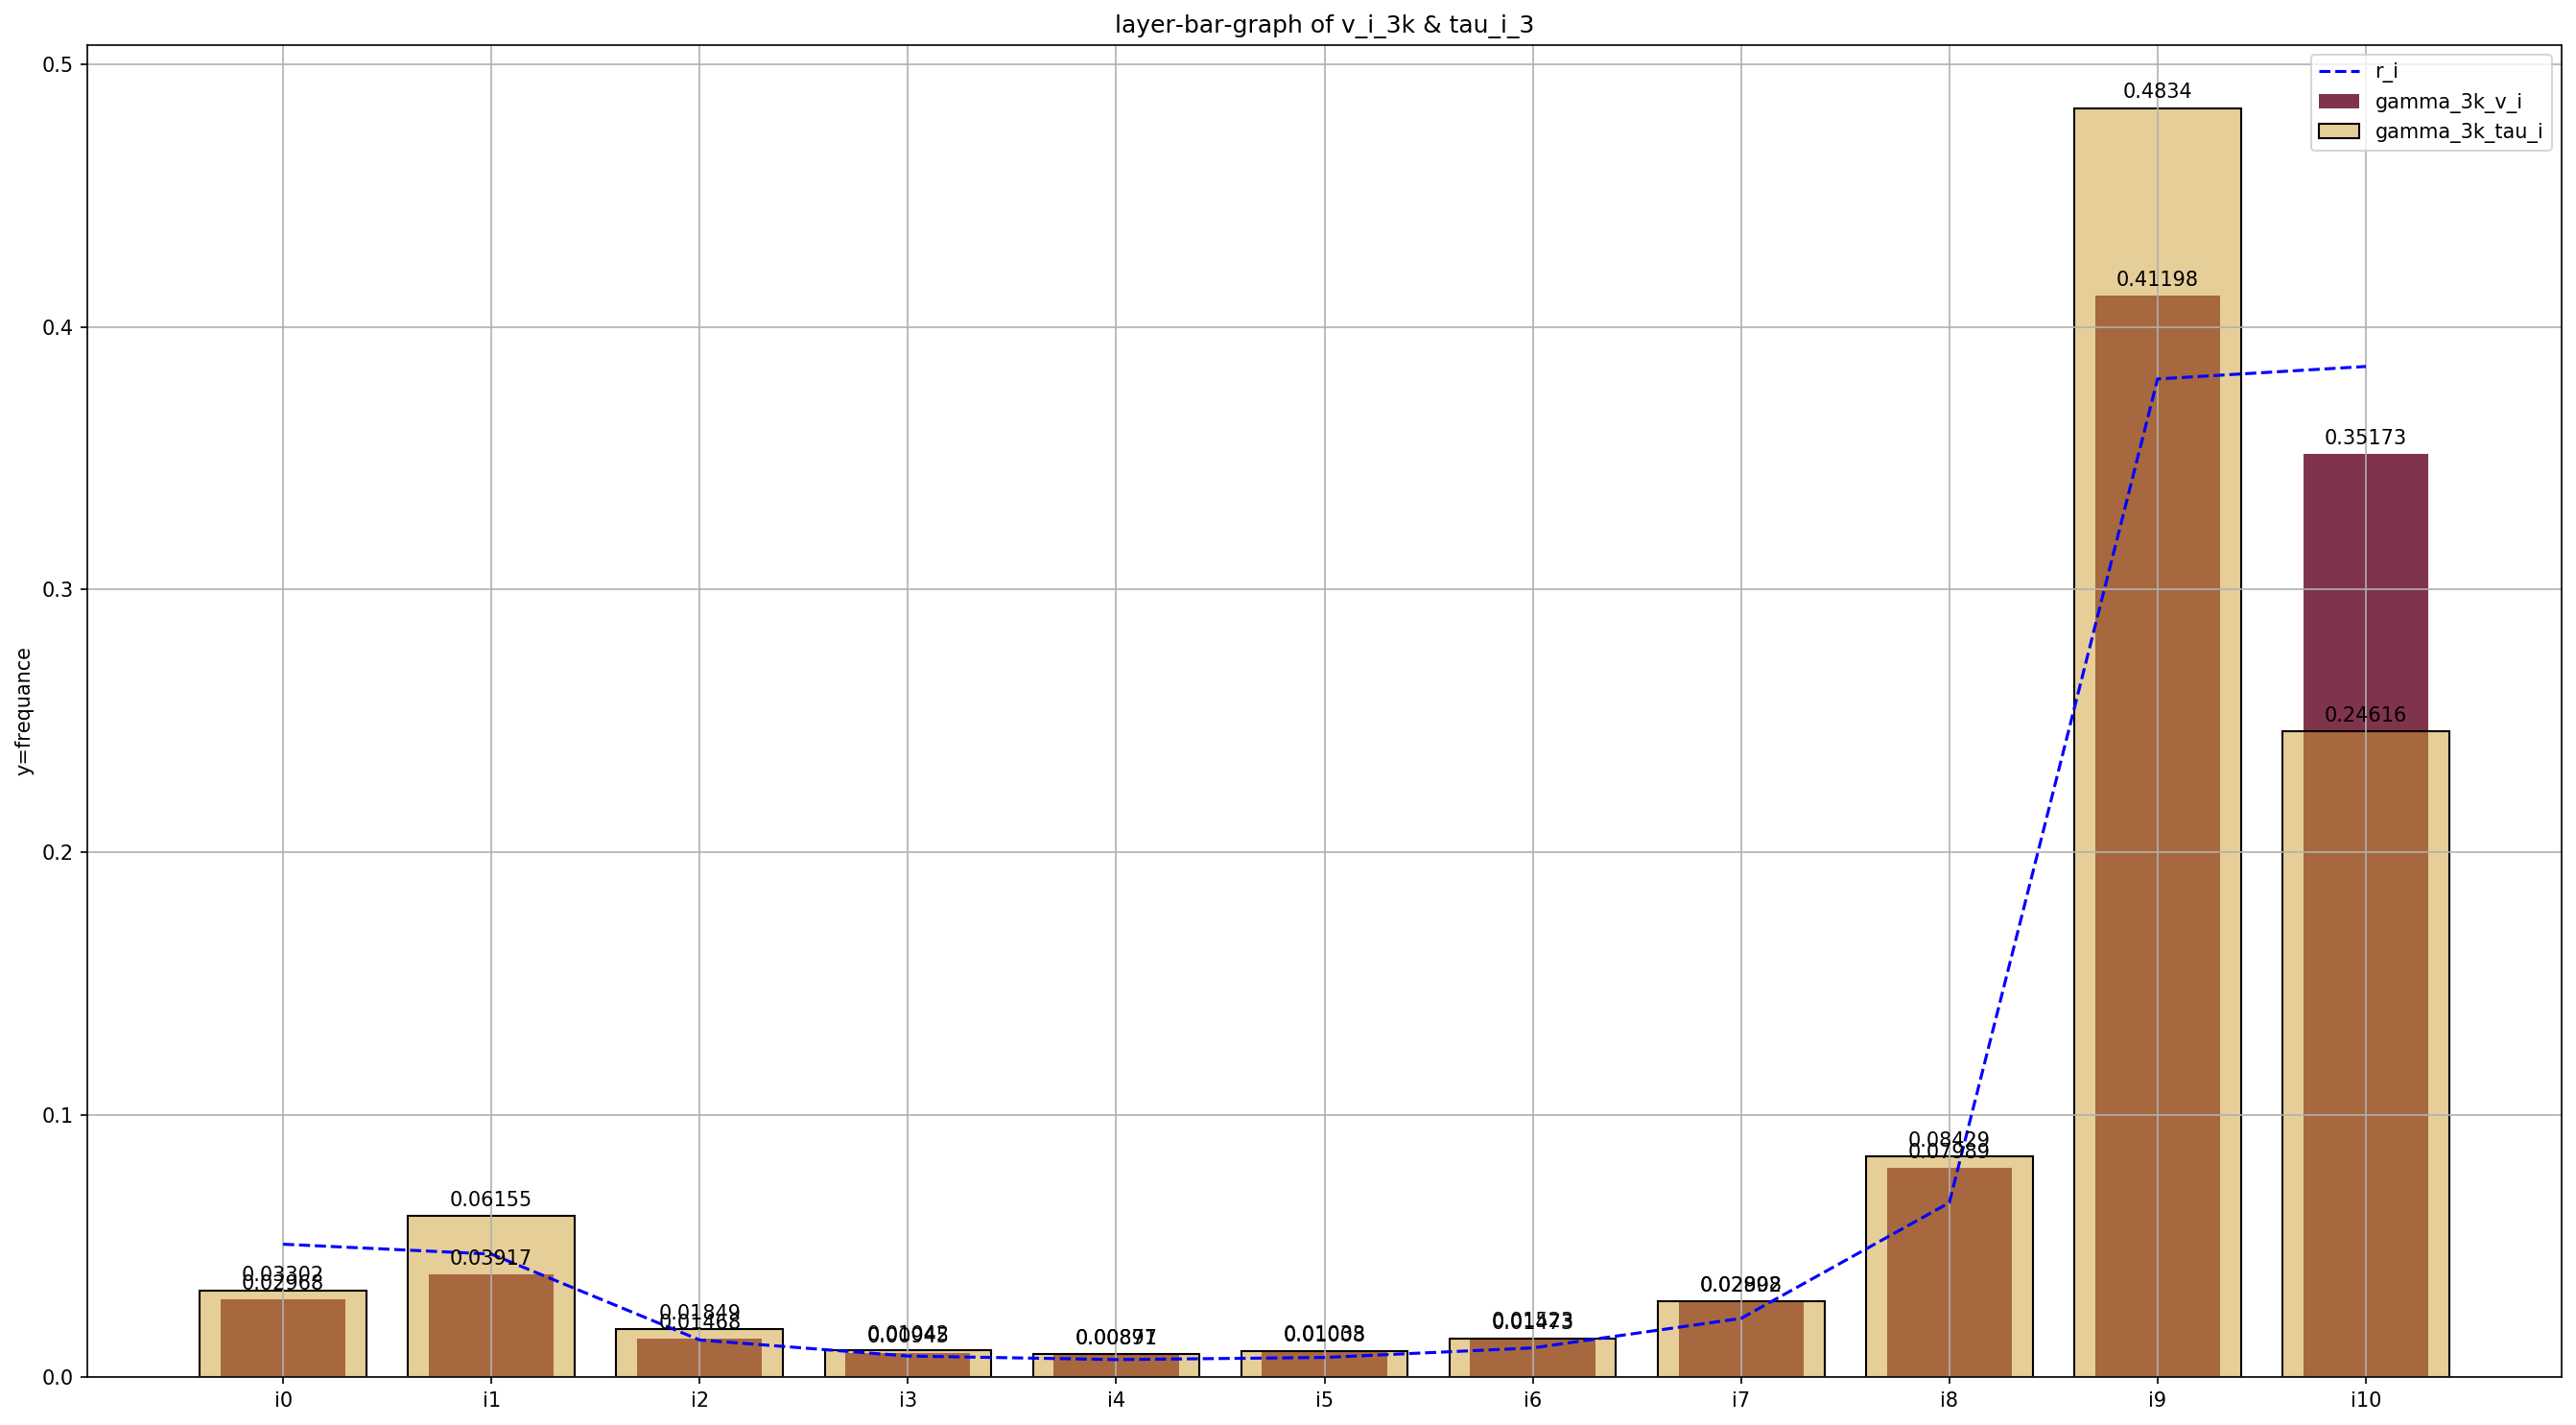

In [22]:
def bar_on_builder(col1,col2,R_arr,G_name='layer-bar-graph',D_name='gamma_2k_',name1='v_i',name2='tau_i'):
    labels = ['i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(18,10))
    main_target=catalogmaker(name='Graphics')

    rects1 = ax.bar(x, col1, color = (0.5, 0.2, 0.3), width = 0.6,label=D_name+name1)#color=color1
    rects2 = ax.bar(x, col2, color = (0.81,0.62,0.20,0.5),edgecolor = 'black',label=D_name+name2)#color=color2
    plt.plot(x,r_arr,'--',color='blue',label='r_i')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('y=frequance')
    ax.set_title(G_name)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.grid()
    fig.savefig(main_target+G_name)
    plt.show()

bar_on_builder(v_i_2,tau_i_2,r_arr,G_name='layer-bar-graph of v_i_2k & tau_i_2',D_name='gamma_2k_')
bar_on_builder(v_i_3,tau_i_3,r_arr,G_name='layer-bar-graph of v_i_3k & tau_i_3',D_name='gamma_3k_')


In [24]:
'''
bar_on_builder(v_i_2,v_i_3,r_arr,G_name='layer-bar-graph of v_i_2k & v_i_3k',D_name='',name1='v_i_2',name2='v_i_3')
bar_on_builder(tau_i_2,tau_i_3,r_arr,G_name='layer-bar-graph of tau_i_2 & tau_i_3',D_name='',name1='tau_i_2',name2='tau_i_3')
'''

"\nbar_on_builder(v_i_2,v_i_3,r_arr,G_name='layer-bar-graph of v_i_2k & v_i_3k',D_name='',name1='v_i_2',name2='v_i_3')\nbar_on_builder(tau_i_2,tau_i_3,r_arr,G_name='layer-bar-graph of tau_i_2 & tau_i_3',D_name='',name1='tau_i_2',name2='tau_i_3')\n"

# График cdf&pdf для liambda matrix (4 middle liambd_i_j)

In [17]:
def F_calc(xxx,aa,sscale,Bord_a=0,Bord_b=0): 
    F=round(gamma.cdf(xxx,a=aa,scale=sscale),5)
    if Bord_a!=0:
        return round(F - Bord_a,5)
    elif Bord_b!=0:
        return round(F - Bord_b,5)
    else:
        return F

def F_calc_pdf(xxx,aa,sscale): 
    F=round(gamma.pdf(xxx,a=aa,scale=sscale),5)#round(gamma.cdf(xxx,a=aa,scale=sscale),5)
    return F

def teoretical_pdf_cdf(massive_liam,param_k_mass,name='teory_test',tip='cdf_',len_x=5):
    rcParams['figure.dpi']=150
    if tip=='cdf_':
        fig, ax = plt.subplots(figsize=(12,10))#plt.figure(figsize=(12,16))
    else:
        fig, ax = plt.subplots(figsize=(12,14))
    
    main_target=catalogmaker(name='Graphics')
    
    y_plot=[]
    x_plot=np.linspace(0,len_x,50)
    NNN=len(massive_liam)
    A_bord=0.2;B_bord=0.8;counter=1
    
    print(param_k_mass,massive_liam)
    for liambd in range(NNN):#take i of liambda
        for i2 in range(len(param_k_mass)):#take i of 3 gamma : expon-gamma1 or gamma2 or gamma3  
            plt.subplot(3,3,counter)
            y_plot=[]
            #print(massive_liam[liambd])
            for j in x_plot:
                aa=param_k_mass[i2]
                sscale=1/massive_liam[liambd]
                if tip=='cdf_':
                    y_plot.append(F_calc(j,aa,sscale))
                else:
                    y_plot.append(F_calc_pdf(j,aa,sscale))

            plt.plot(x_plot,y_plot,'--',color='red',label='a=k="%s" ,scale=%s / %s'%(param_k_mass[i2],1,massive_liam[liambd]))
            
            if tip=='cdf_':
                y_plot.clear()
                for i in x_plot:
                    y_plot.append(A_bord)    
                plt.plot(x_plot,y_plot,'-',color='black',label='A_border')

                if B_bord!=0:
                    y_plot.clear()
                    for i in x_plot:
                        y_plot.append(B_bord)    
                    plt.plot(x_plot,y_plot,'-',color='black',label='B_border')
            plt.xticks(np.arange(0,len_x,step=0.5))        
            plt.legend()
            plt.title('cdf_%s'%('gamma'+str(param_k_mass[i2])))
            plt.xlabel('x')
            plt.ylabel('y-time')
            plt.grid(True)
            counter+=1
    plt.tight_layout(h_pad = 1)
    fig.savefig(main_target+name+tip)

[1, 2, 3] [1.4, 4.4, 5.4]
[1, 2, 3] [1.4, 4.4, 5.4]


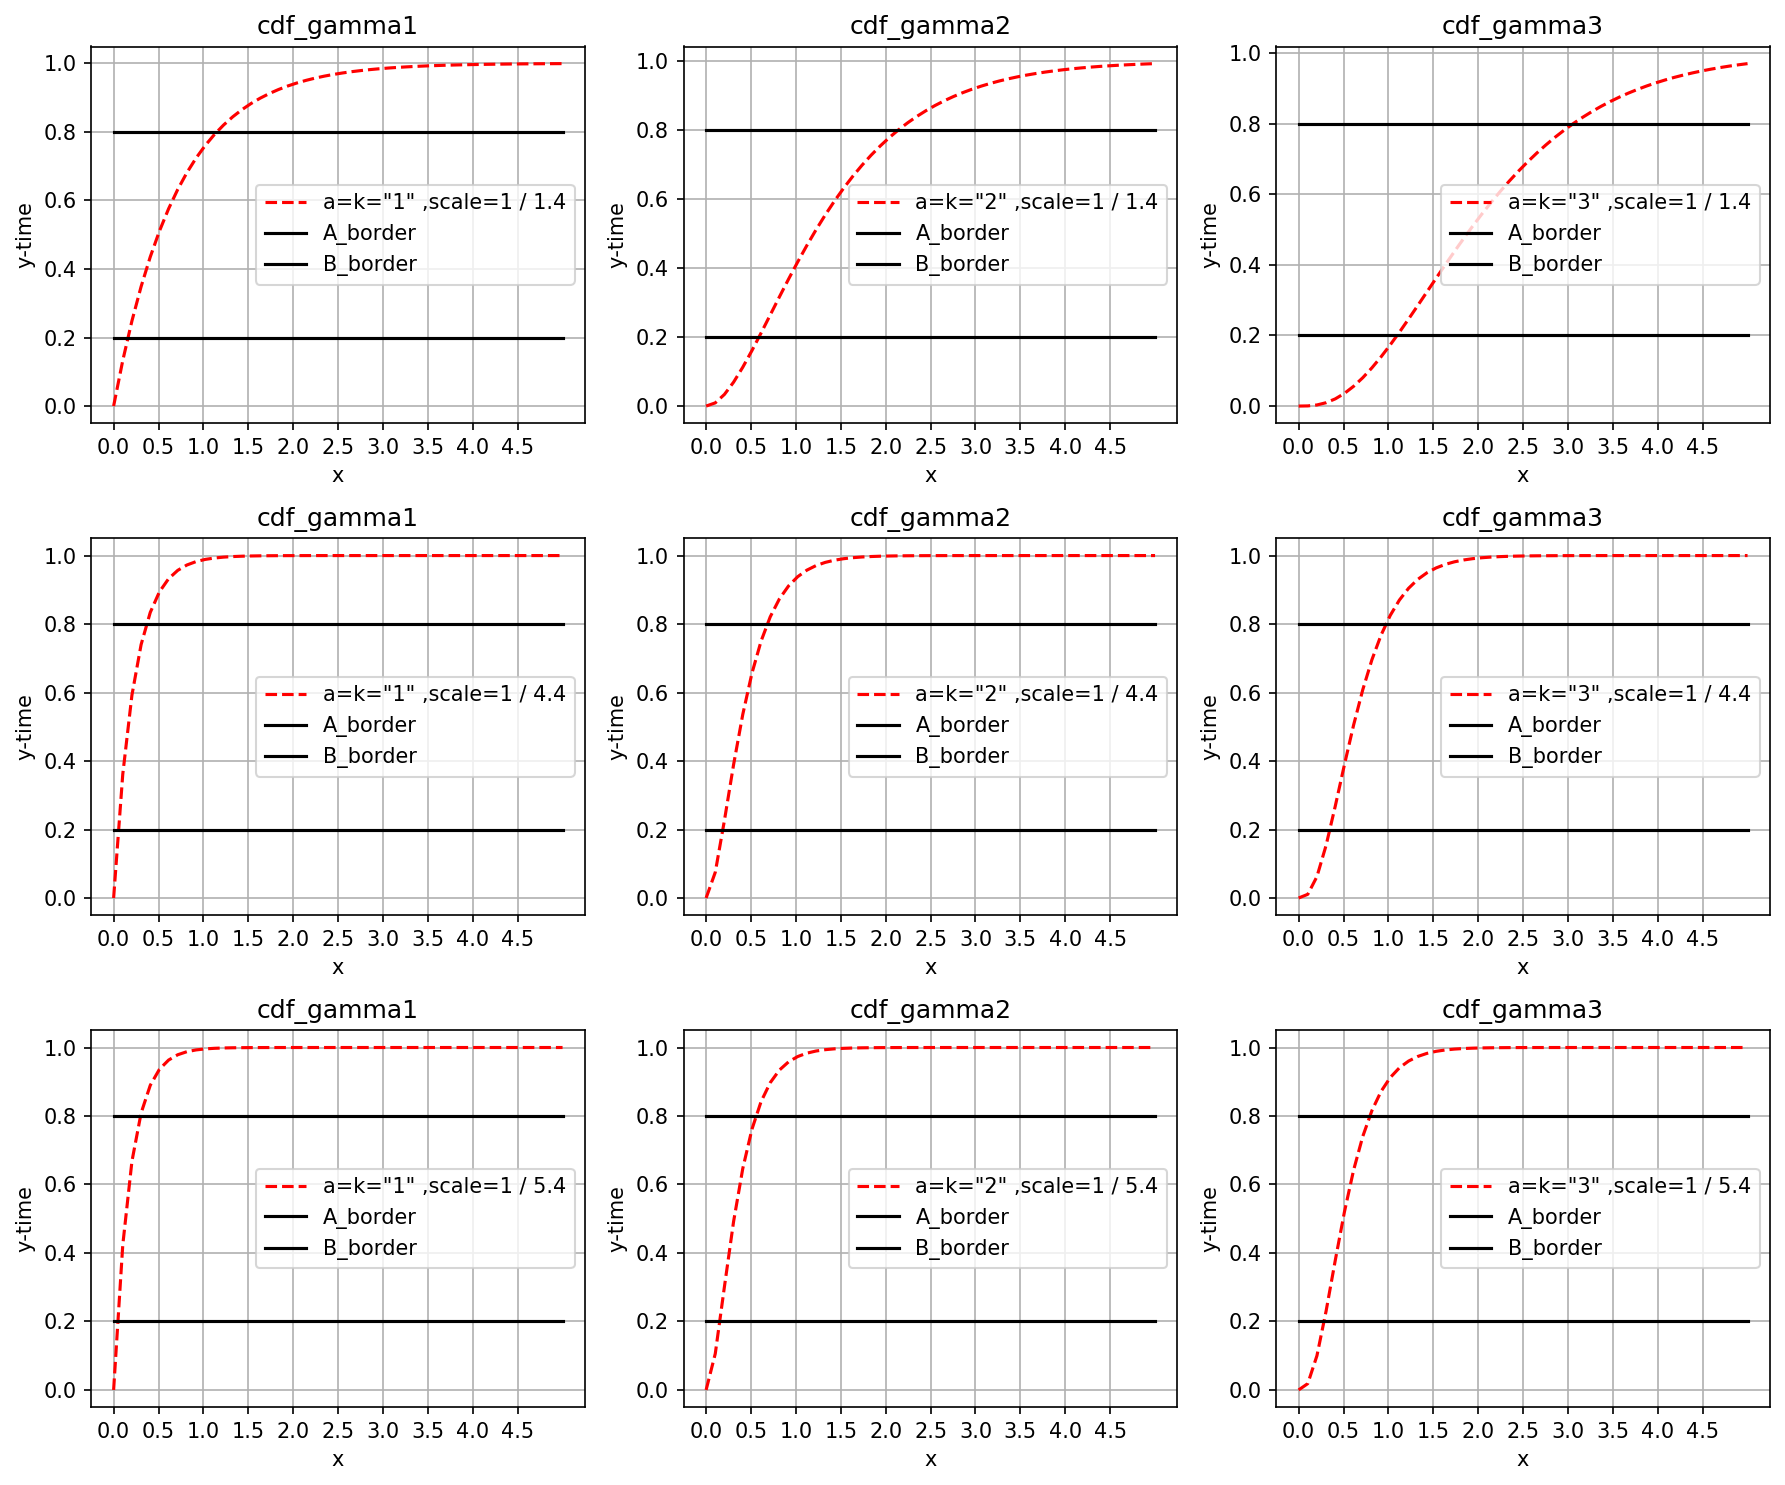

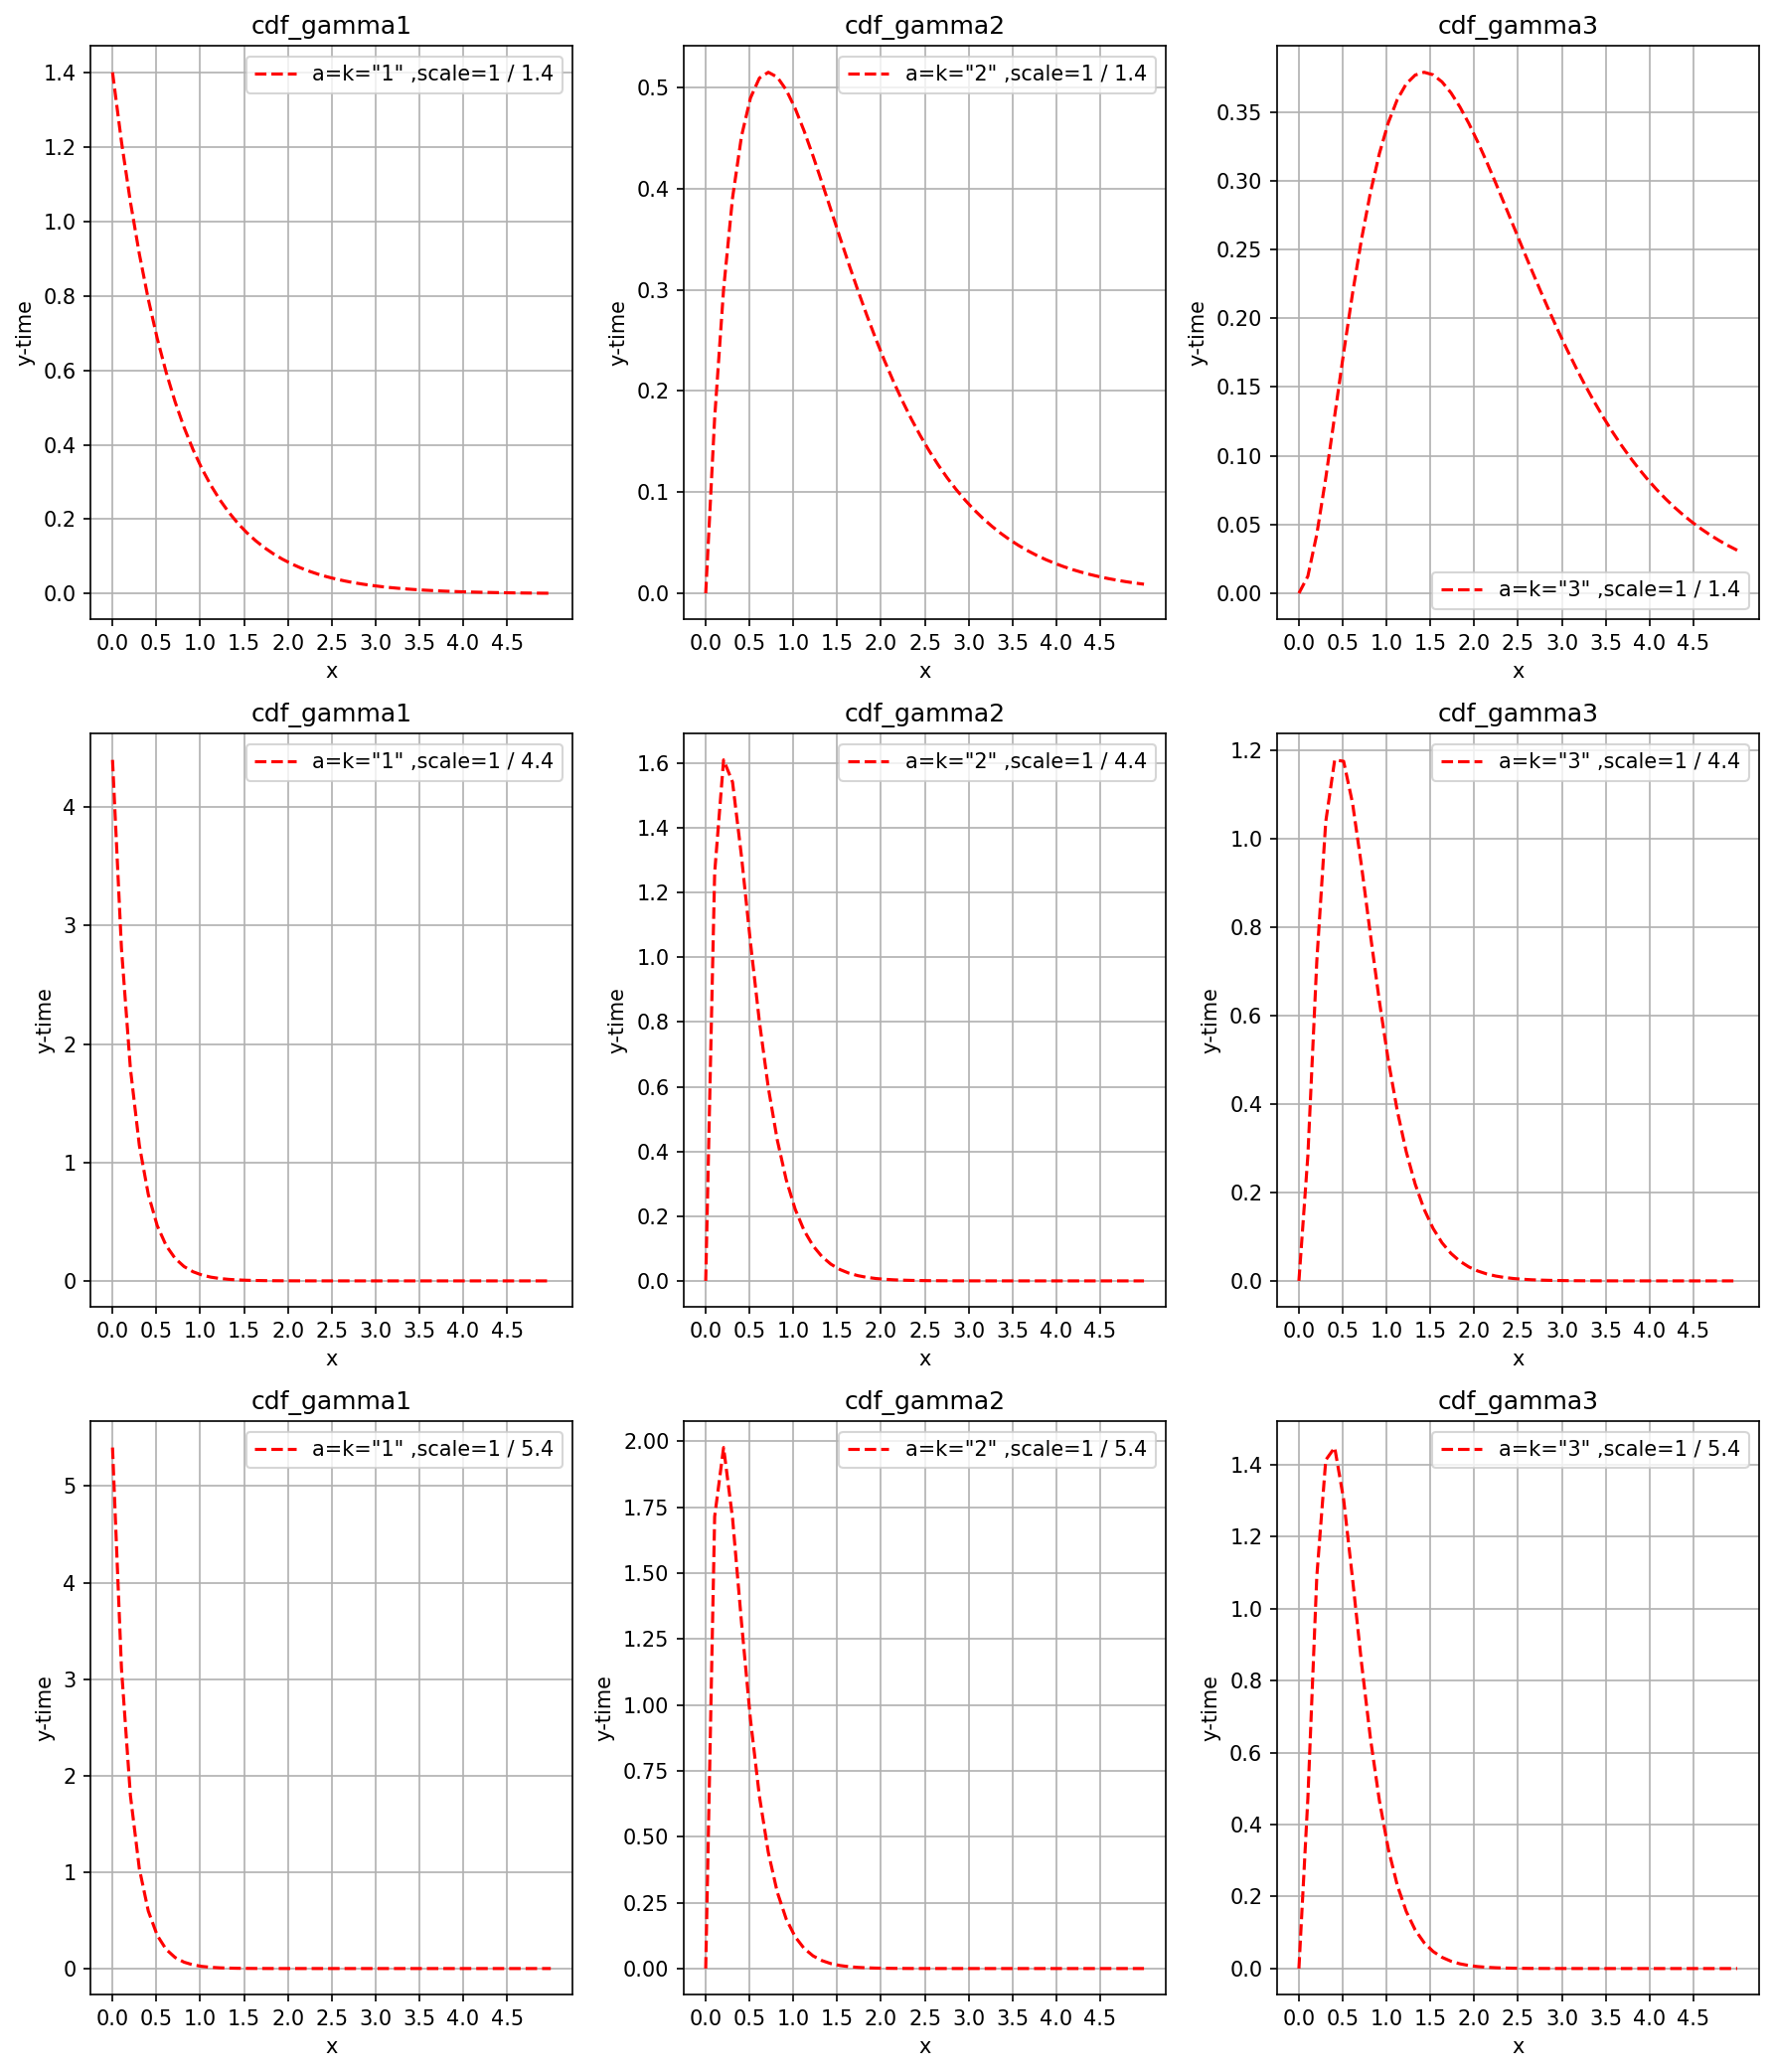

In [18]:
simmilar=take_pd(name='simmilar_',Mu_name=0.8,column='simmilar')
te=[]
te.append(min(simmilar))#(1.7)
te.append(simmilar[len(simmilar)//2])
te.append(max(simmilar))
#print(te)
teoretical_pdf_cdf(massive_liam=te,param_k_mass=[1,2,3],name='teory_test_')
teoretical_pdf_cdf(massive_liam=te,param_k_mass=[1,2,3],name='teory_test_',tip='pdf_')

# Построим средние значения для моделей  

In [44]:
print(N_1)
print(T_1,'\n')
print(N_2)
print(T_2,'\n')
print(N_3)
print(T_3,'\n')

N_1_aver =round(sum(N_1)/len(N_1))
T_1_aver =round(sum(T_1)/len(T_1),5) 
print('Avarage characteristics for Mark: ',N_1_aver,'\t',T_1_aver,'\n')

N_2_aver =round(sum(N_2)/len(N_2))
T_2_aver =round(sum(T_2)/len(T_2),5) 
print('Avarage characteristics for Erl_2: ',N_2_aver,'\t',T_2_aver,'\n')

N_3_aver =round(sum(N_3)/len(N_3))
T_3_aver =round(sum(T_3)/len(T_3),5) 
print('Avarage characteristics for Erl_3: ',N_3_aver,'\t',T_3_aver,'\n')

massive_time=[T_1_aver,T_2_aver,T_3_aver]
massive_gen=[N_1_aver,N_2_aver,N_3_aver]

[11742.0, 12046.0, 12074.0, 11730.0, 12082.0, 11875.0, 11772.0, 11759.0, 12416.0, 11697.0, 12612.0]
[1324.83375, 1332.44367, 1359.98244, 1322.51815, 1376.31791, 1356.44527, 1328.20901, 1346.4246, 1432.28869, 1290.46752, 1416.72009] 

[16090.0, 16120.0, 16486.0, 16058.0, 15814.0, 15081.0, 15296.0, 16256.0, 15194.0, 15913.0, 15554.0]
[5067.68812, 5006.36963, 5181.04503, 5051.48622, 4952.24727, 4663.08093, 4799.64312, 5110.69955, 4772.66373, 4988.96202, 4895.28066] 

[18910.0, 19594.0, 19032.0, 18721.0, 19130.0, 18957.0, 19034.0, 18586.0, 18534.0, 18989.0, 18320.0]
[9343.75962, 9750.09958, 9448.83381, 9074.68343, 9428.60179, 9267.59947, 9308.24672, 9125.27433, 8986.81607, 9365.08088, 8805.4871] 

Avarage characteristics for Mark:  11982.0 	 1353.33192 

Avarage characteristics for Erl_2:  15806.0 	 4953.56057 

Avarage characteristics for Erl_3:  18892.0 	 9264.04389 



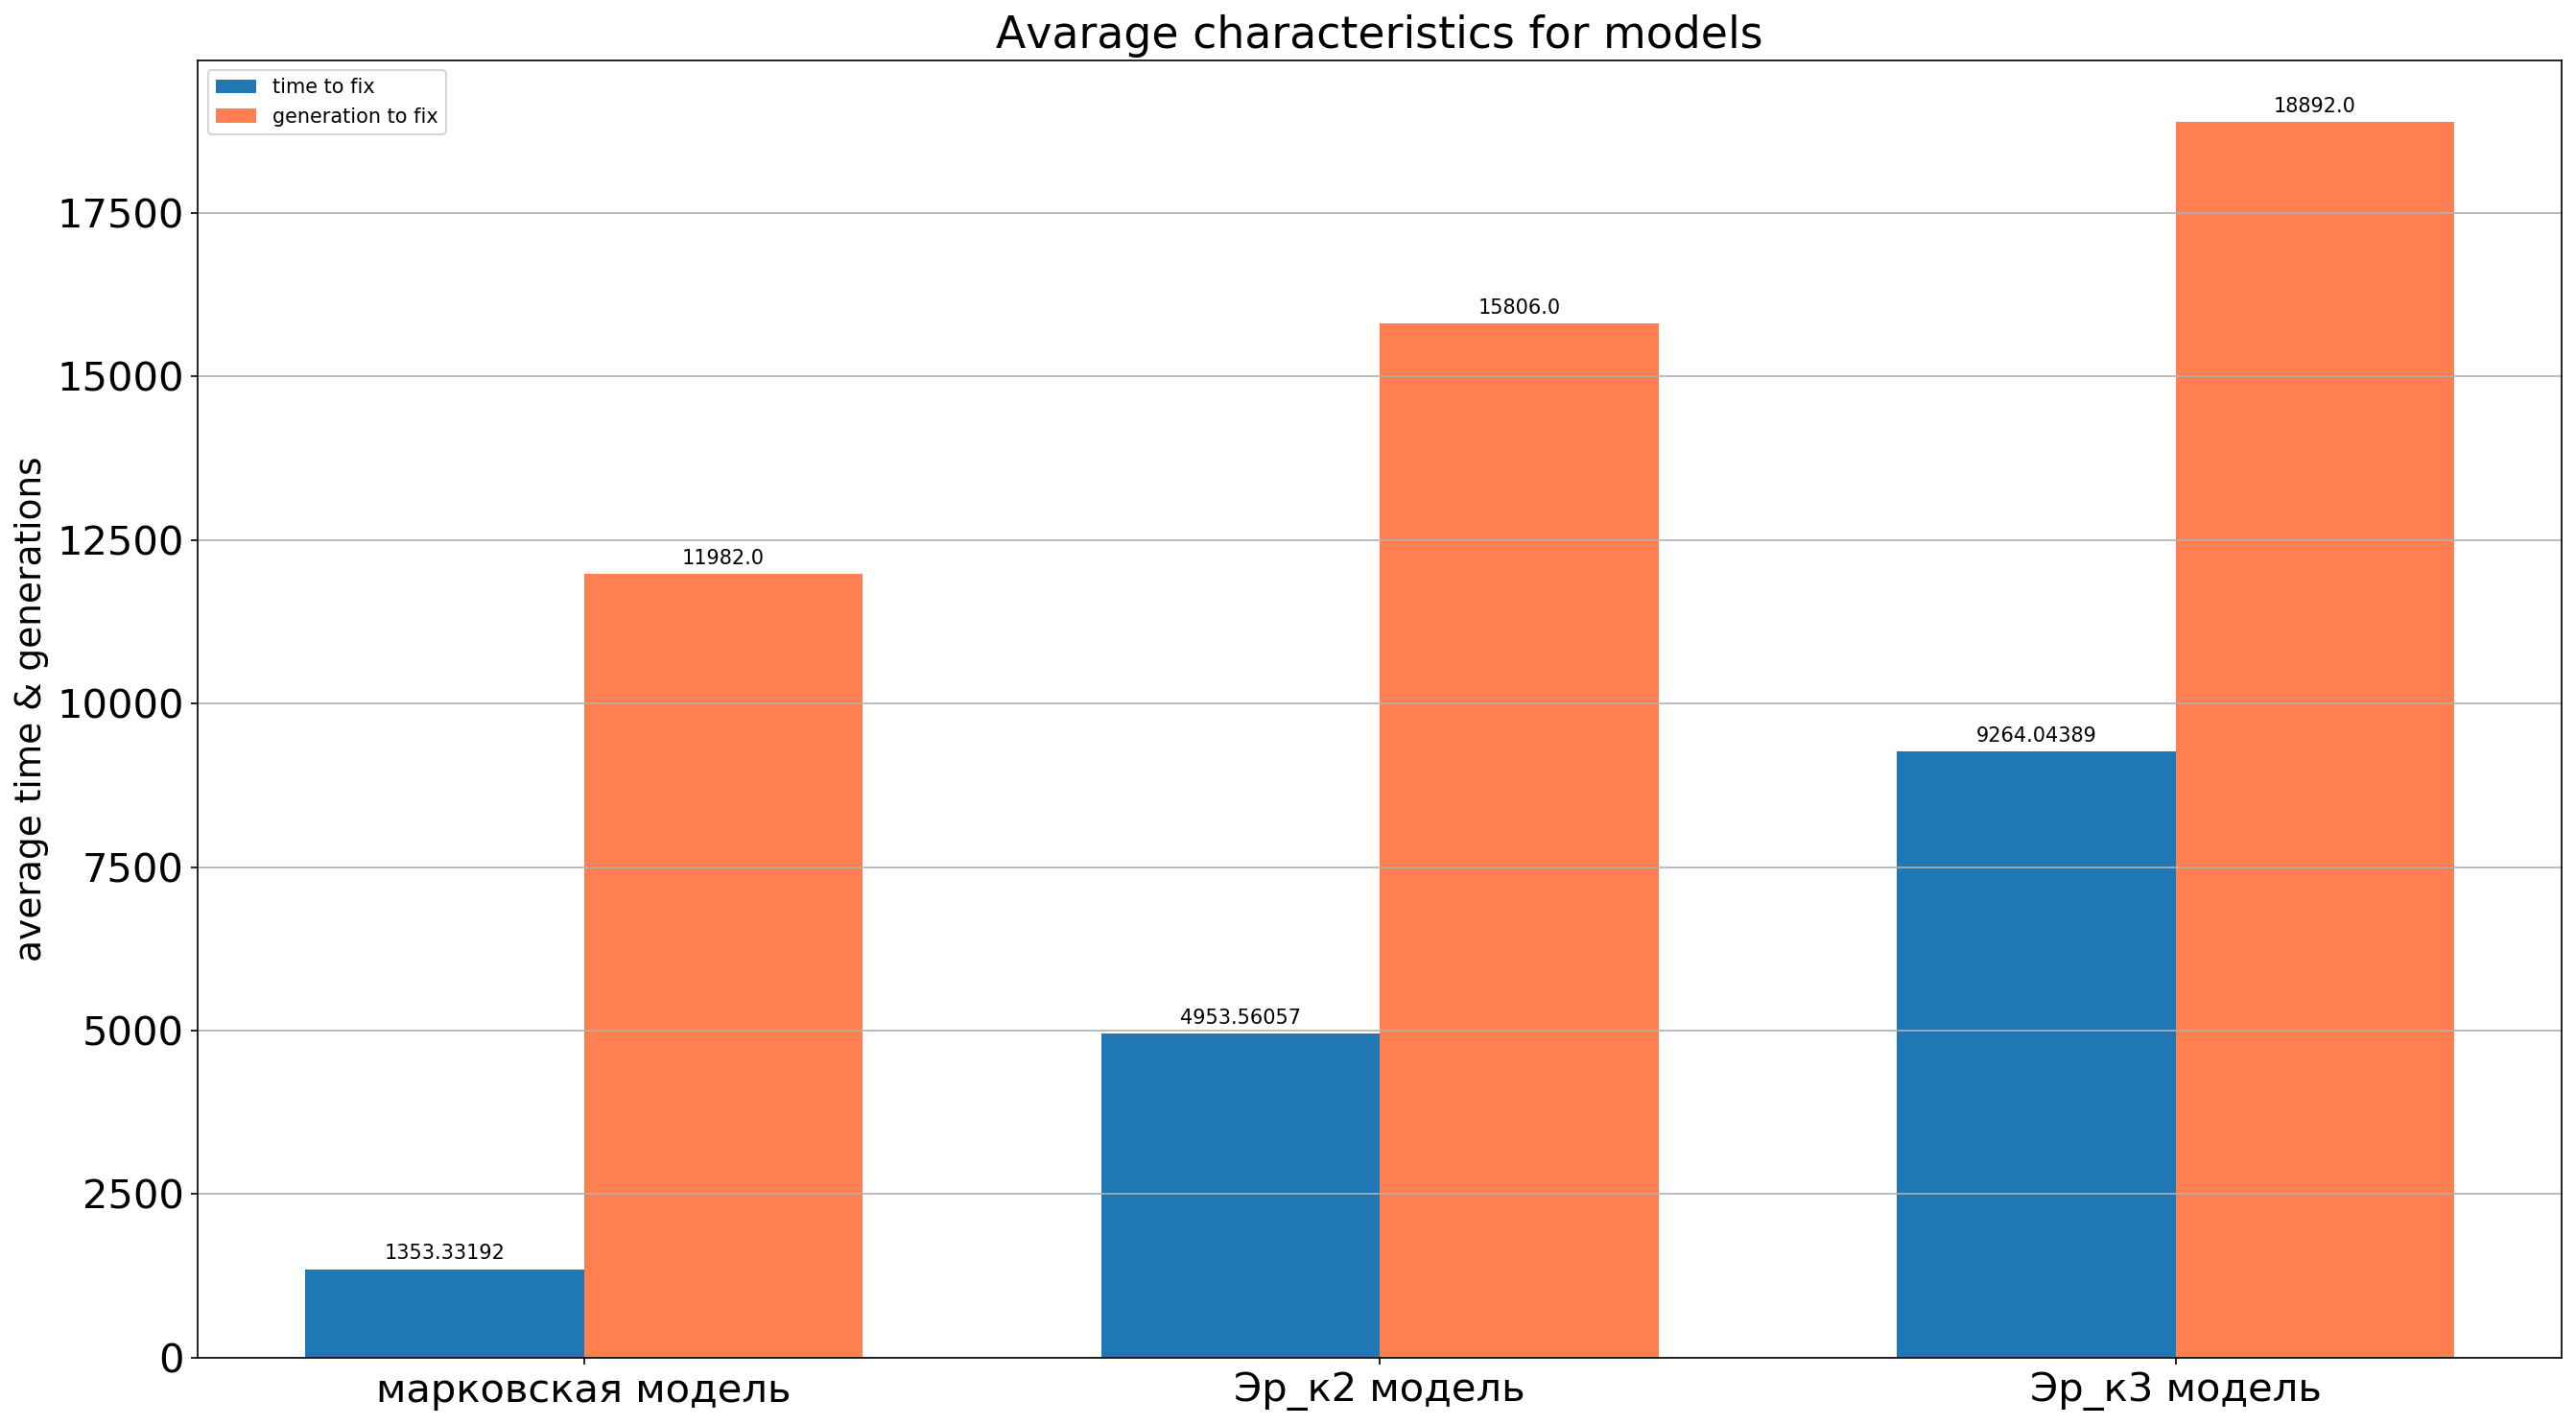

In [52]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)  

def aver_model_bar_next(mas1,mas2,name1='bar-graph',name2='y',color1='red',color2='coral'):
    labels = ['марковская модель', 'Эр_к2 модель', 'Эр_к3 модель']
    col1 = mas1#Time_k=1,2,3
    col2 = mas2#generation_k=1,2,3

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(18,10))
    main_target=catalogmaker(name='Graphics')

    rects1 = ax.bar(x - width/2, col1, width, label='time to fix')#,color=color1
    rects2 = ax.bar(x + width/2, col2, width, label='generation to fix',color=color2)#,color=color2
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(name1,fontsize = 18)
    ax.set_title(name2,fontsize = 22)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.grid(axis = 'y')
    fig.savefig(main_target+name2)
    plt.show()
    

aver_model_bar_next(massive_time,massive_gen,name1='average time & generations',name2='Avarage characteristics for models')

# Зададим отношение кол-ва времени к ко-ву поколений для фиксации

In [58]:
N_1_T = round(T_1_aver/N_1_aver,2)
N_2_T = round(T_2_aver/N_2_aver,2)
N_3_T = round(T_3_aver/N_3_aver,2)

massive_n_t=[N_1_T,N_2_T,N_3_T]
print(massive_n_t)

[0.11, 0.31, 0.49]


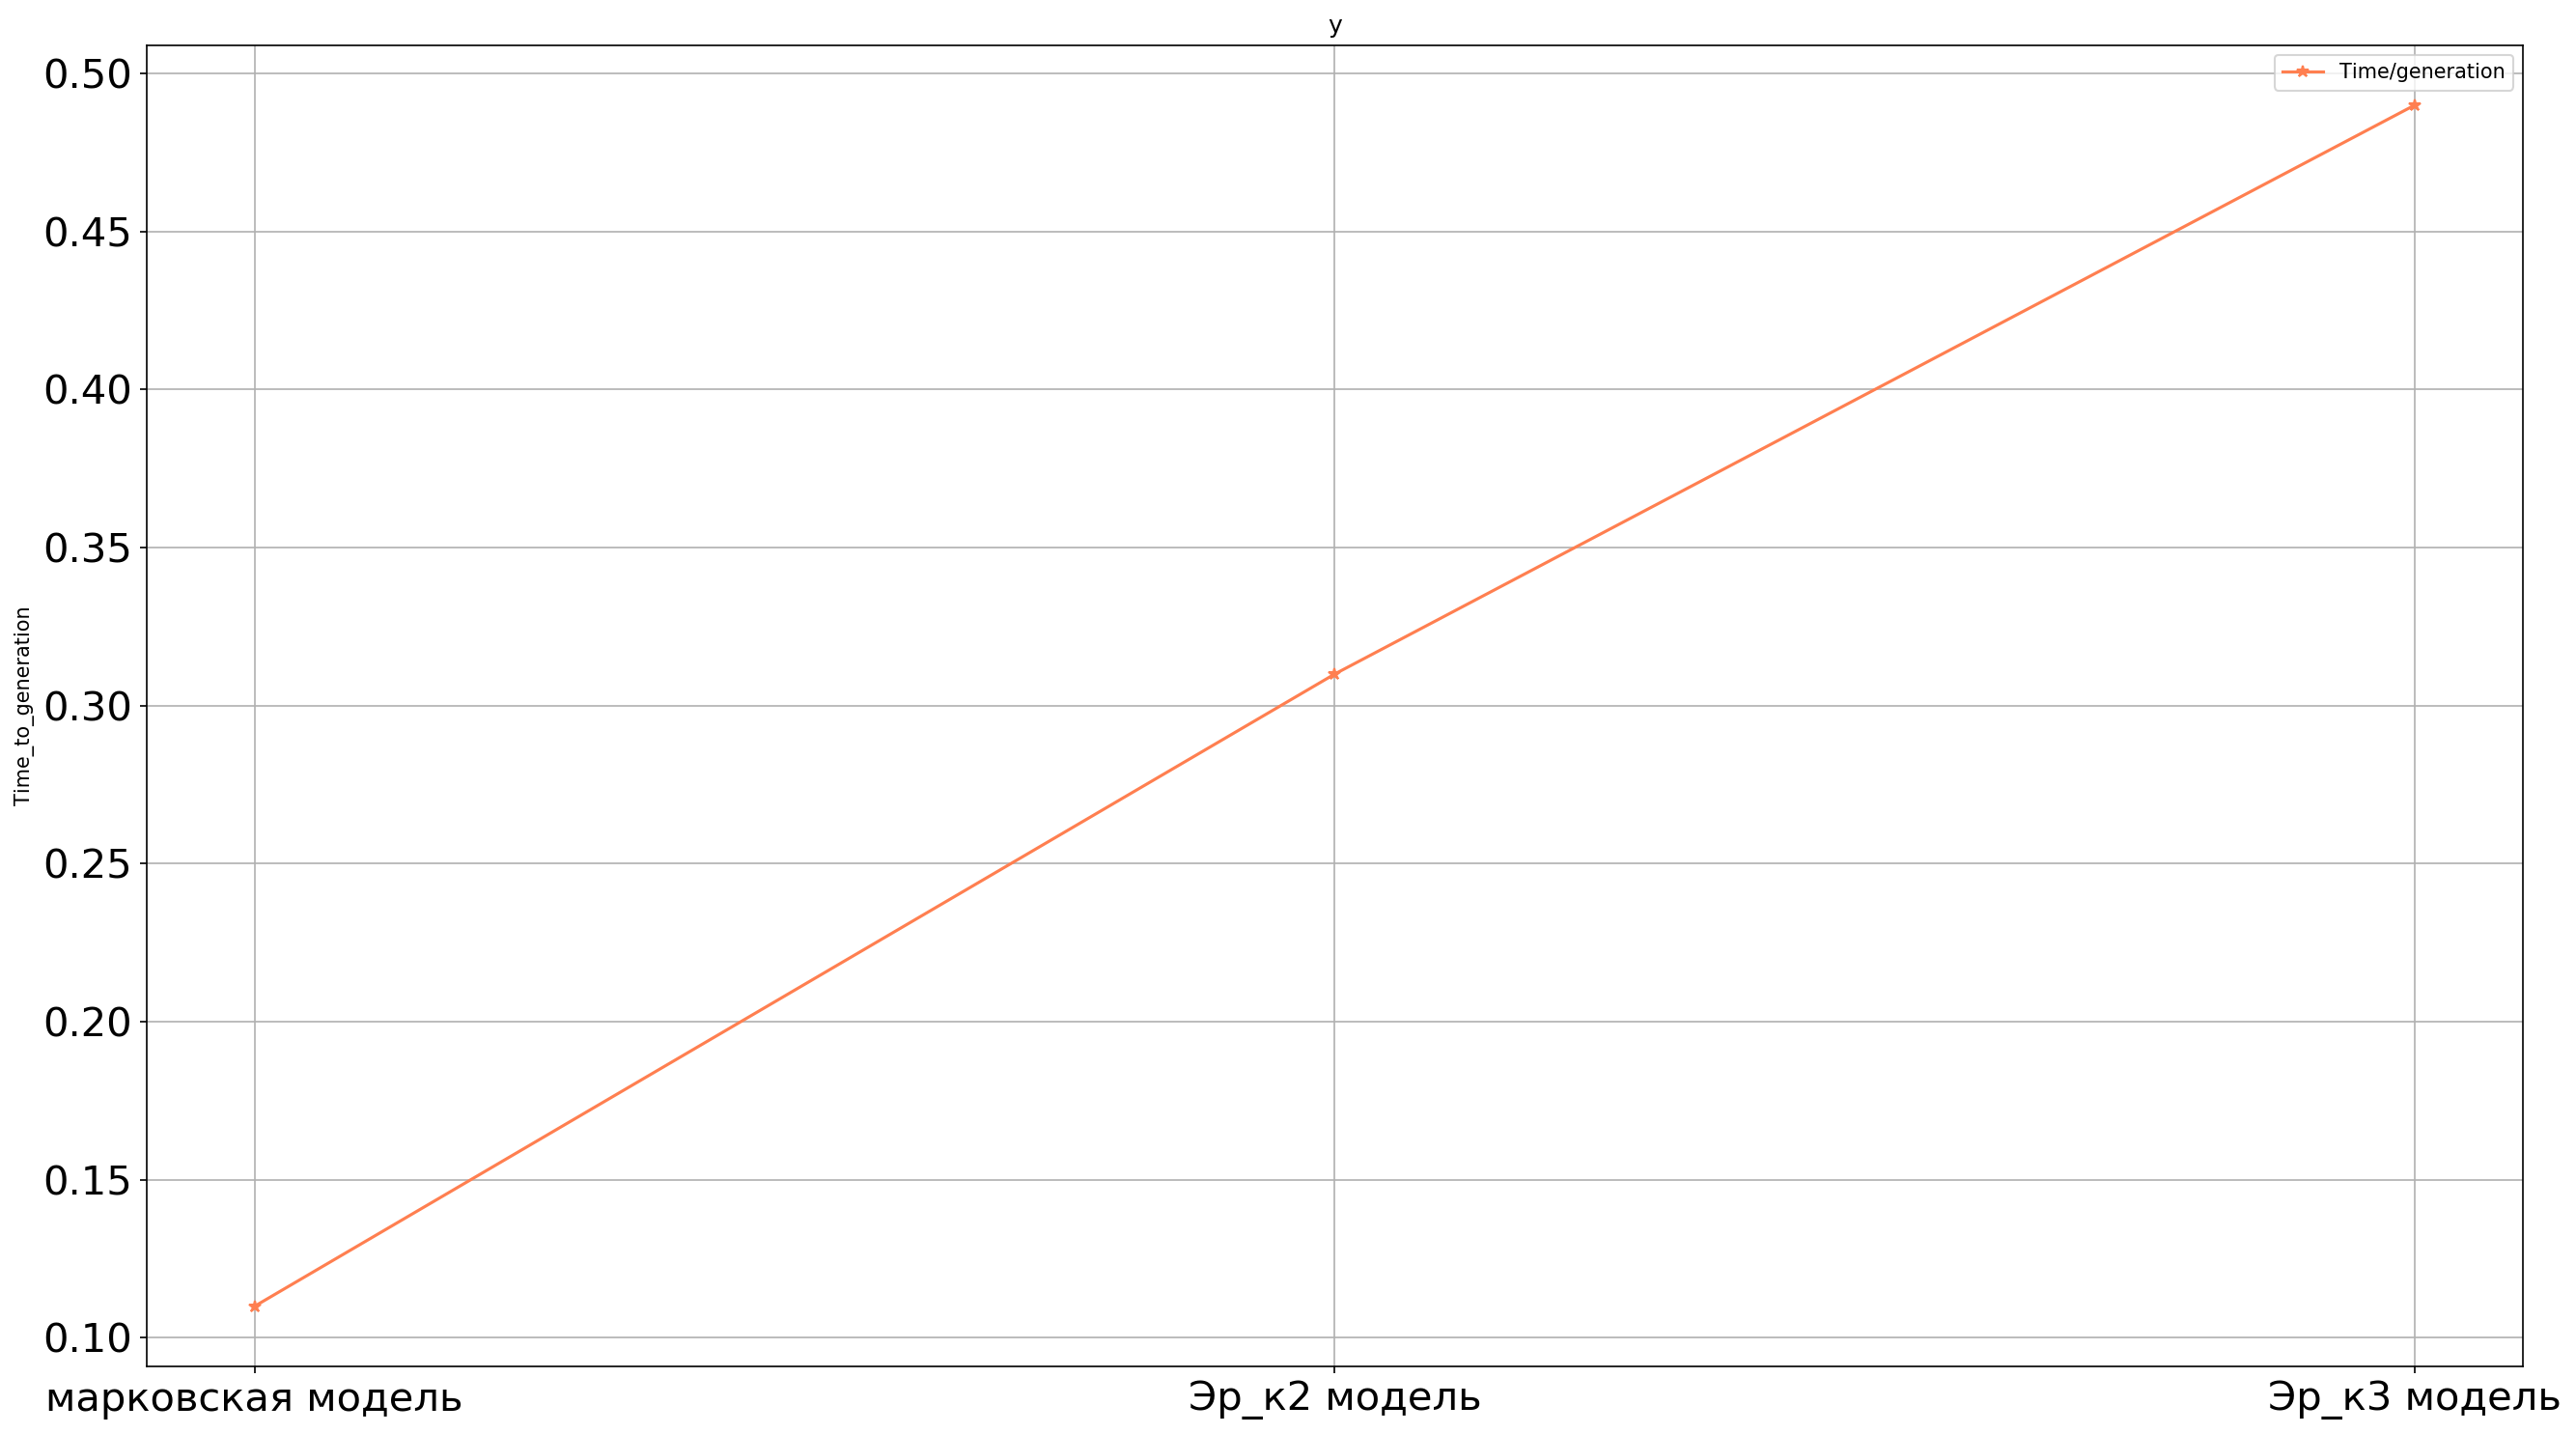

In [62]:
def N_to_T_graph(y,name1='line_graph',name2='y',color1='red',color2='coral'):
    rcParams['figure.dpi']=150
    fig, ax = plt.subplots(figsize=(18,10))#plt.figure(figsize=(6,3))
    main_target=catalogmaker(name='Graphics')
    
    labels = ['марковская модель', 'Эр_к2 модель', 'Эр_к3 модель']
    x = np.arange(len(labels))  # the label locations
        
    plt.plot(x, y,label='Time/generation',color=color2,marker="*")
    plt.xticks(x)#pylab.ylim(0.0,1.0)
    ax.set_xticklabels(labels)
    plt.legend()
    plt.title(name2)
    
    plt.ylabel('Time_to_generation')
    plt.grid(True)#;plt.show()
    fig.savefig(main_target+name1+'Time_to_generation')
    plt.tight_layout(h_pad = 1)
    #plt.show()
    #print('v_i:',y_answ1)
    #print('\ntau_i:',y_answ2) 
    '''
    labels = ['марковская модель', 'Эр_к2 модель', 'Эр_к3 модель']
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(18,10))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(name1,fontsize = 18)
    ax.set_title(name2,fontsize = 22)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.grid(axis = 'y')
    fig.savefig(main_target+name2)
    plt.show()
    '''
N_to_T_graph(y=massive_n_t,name1='line_graph',name2='y',color1='red',color2='coral')

# --------------------------------------------------------------

# First bar () version with neighbor -1 layer

In [27]:
def bar_next_builder(mas1,mas2,name1='bar-graph',name2='y',color1='red',color2='coral'):
    labels = ['i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10']
    col1 = mas1#Time_2
    col2 = mas2#Time_3

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(18,10))
    main_target=catalogmaker(name='Graphics')

    rects1 = ax.bar(x - width/2, col1, width, label=_name2)#,color=color1
    rects2 = ax.bar(x + width/2, col2, width, label=_name3,color=color2)#,color=color2
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(name2)
    ax.set_title(name1)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.grid(axis = 'y')
    plt.show()
    

#bar_next_builder(N_2,N_3,name1='Generation bar-graph',name2='N to fix from i')
#bar_next_builder(T_2,T_3,name1='Time bar-graph',name2='Time to fix from i')


# Colorful bar () version

In [ ]:
#colorful version
'''x = np.arange(1, 8)
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)
fig, ax = plt.subplots(figsize=(18,10))

color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(x, y1, color = color_rectangle, width = 0.6,label='1')
print(color_rectangle)
arr=[]
for i in range(len(color_rectangle)):
    arr.append([])
    arr[i]=np.append(color_rectangle[i],np.array(0.5))
print()
print(arr)
    
#color_rectangle = np.random.rand(7, 4)    # RGBA (0.5, 0.2, 0.3, 0.8)
#color_rectangle[:,3] = 0.5
ax.bar(x, y2, color = arr,edgecolor = 'darkblue',label='2')

ax.legend()
plt.grid(axis = 'y')
plt.show()'''